# YSB

# About the Data
### This dataset reflects the operational and procurement activity of YSB, an Israeli infrastructure company. 
It includes records of inventory movements, supplier orders, goods receipts, customer orders, and year-end inventory valuation (as of December 31, 2024).
The data was collected from internal company systems and covers the period from January to August 2025, enabling analysis of project-level performance, procurement efficiency, and inventory management.


# Column Descriptions for YSB Operations Dataset

1. **Date** – Date of the transaction or record.
2. **Inventory Movement Type** – Type of inventory action (e.g., supplier receipt, internal transfer).
3. **Document Number** – Reference number of invoice or delivery note.
4. **Item Code** – Unique product or material identifier (מק"ט).
5. **Item Description** – Description of the item received, moved, or ordered.
6. **Quantity** – Number of units involved in the transaction.
7. **Unit of Measure** – Unit used (e.g., units, kg, meters).
8. **Unit Cost (ILS)** – Cost per unit in Israeli Shekels.
9. **Total Cost (ILS)** – Total cost of the transaction in ILS.
10. **Final Price** – Final agreed price in purchase orders.
11. **Base Price** – Standard price before discounts or negotiations.
12. **Supplier Name** – Name of the supplier.
13. **Supplier ID** – Unique identifier for the supplier.
14. **Customer Name** – Name of the client or project owner.
15. **Customer ID** – Unique customer identifier.
16. **Project Code** – Internal code representing a project.
17. **Project Description** – Description or name of the infrastructure project.
18. **Order Number** – Purchase or sales order reference.
19. **Order Status** – Indicates whether the order is completed or open.
20. **Inventory Value** – Calculated value of items in stock.
21. **Warehouse / Location** – Where the inventory is stored or delivered.
22. **Delivery Date** – Date of actual or planned goods receipt.
23. **Product Version / BOM** – Version of the product or Bill of Materials.
24. **Signature / Timestamp** – User and time the action was recorded in the system.


<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_53%20PM.png" width="700"/>
</div>


In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [200]:
# קריאה של כל קובץ ל-DataFrame
inventory_jan_apr = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inventory_apr_on = pd.read_csv("inventory_movements_apr_on_2025.csv")
supplier_orders = pd.read_csv("supplier_orders_2025.csv")
goods_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")
customer_orders = pd.read_csv("customer_orders_2025.csv")
inventory_valuation = pd.read_csv("inventory_valuation_2024_12_31.csv")

# שמירה במילון לצורך גישה נוחה
data_dict = {
    "Inventory Jan-Apr": inventory_jan_apr,
    "Inventory Apr-On": inventory_apr_on,
    "Supplier Orders": supplier_orders,
    "Goods Receipts": goods_receipts,
    "Customer Orders": customer_orders,
    "Inventory Valuation Dec 31 2024": inventory_valuation
}

# הצגת סיכום של כל הטבלאות
summary = {}
for name, df in data_dict.items():
    summary[name] = {
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum()
    }

summary_df = pd.DataFrame(summary).T
print("Dataset Overview:")
print(summary_df)

# הצגה של 5 שורות ראשונות מכל טבלה (לבדיקה)
for name, df in data_dict.items():
    print(f"\n--- {name} ---")
    print(df.head())


Dataset Overview:
                                 Rows  Columns  Missing Values
Inventory Jan-Apr                8819       43          145440
Inventory Apr-On                 4937       43           79763
Supplier Orders                  1977       12               6
Goods Receipts                   1532       14              11
Customer Orders                  7279       39           60112
Inventory Valuation Dec 31 2024  8186        7            5814

--- Inventory Jan-Apr ---
      תאריך    סוג תנועת מלאי מס. תעודה/חשבונית      מק"ט  \
0  1/2/2025  קבלות סחורה מספק        GR25000010  26000051   
1  1/2/2025  קבלות סחורה מספק        GR25000010  26000862   
2  1/2/2025  קבלות סחורה מספק        GR25000010  26000912   
3  1/2/2025  קבלות סחורה מספק        GR25000011  19001084   
4  1/2/2025  קבלות סחורה מספק        GR25000012  34000166   

                                תאור מוצר  כמות (קניה/מכירה)  \
0                     כבל רשת 15 מ' CAT-6               10.0   
1                  

In [201]:
for name, df in data_dict.items():
    print(f"\n===== {name} =====")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print("Column Names:", list(df.columns))
    print("Missing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
    print("Data Types:\n", df.dtypes.value_counts())

missing_summary = {}
for name, df in data_dict.items():
    missing_summary[name] = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame(missing_summary).T
print("\n% Missing Values per Table:")
print(missing_df)

for name, df in data_dict.items():
    print(f"\n=== Checking {name} ===")
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe().T)
    else:
        print("No numeric columns")

# --- שלב 4: שמירת סיכום לקובץ ---
missing_df.to_csv("missing_values_summary.csv", encoding="utf-8-sig")
print("\n📁 File 'missing_values_summary.csv' saved.")



===== Inventory Jan-Apr =====
Shape: 8819 rows × 43 columns
Column Names: ['תאריך', 'סוג תנועת מלאי', 'מס. תעודה/חשבונית', 'מק"ט', 'תאור מוצר', 'כמות (קניה/מכירה)', 'עלות ש"ח ליח\' ק/מ', 'עלות ש"ח', 'מקור עלות', "מס' לקוח", 'שם לקוח', "מס' ספק", 'שם ספק', 'מחסן', 'איתור', 'פק"ע/מנה', 'מהדורת מוצר', 'מהדורת עץ מוצר', "יח' קניה/מכירה", 'כמות מפעל', "יח' מפעל", "עלות USD ליח' ק/מ", 'עלות USD', 'מטבע תנועה', 'למחסן', 'לאיתור', 'למק"ט', 'תאור מוצר.1', 'לפק"ע/מנה', 'מהדורת עץ מוצר.1', 'מסטטוס', 'לסטטוס', 'מפעולה/משטח', 'לפעולה/משטח', 'עבור פק"ע', 'עבור מק"ט', 'תאור מוצר.2', 'עבור פעולה/משטח', 'מס. אריזות', 'קוד סוג אריזה', 'תאור סוג אריזה', 'חתימה', 'ת. חתימה']
Missing Values:
 מהדורת עץ מוצר.1    8819
עבור מק"ט           8819
מפעולה/משטח         8819
תאור סוג אריזה      8819
קוד סוג אריזה       8819
לפעולה/משטח         8819
עבור פעולה/משטח     8819
תאור מוצר.2         8819
עבור פק"ע           8819
מהדורת עץ מוצר      8819
dtype: int64
Data Types:
 float64    21
object     19
int64       3


In [202]:
#איחוד לשנה שלמה
inventory_movements = pd.concat([inventory_jan_apr, inventory_apr_on], ignore_index=True)


In [203]:
# בדוק את שמות העמודות בשתי הטבלאות
print("== Orders Columns ==")
print(orders.columns.tolist())

print("\n== Receipts Columns ==")
print(receipts.columns.tolist())

== Orders Columns ==
["מס' ספק", 'שם ספק', 'הזמנה', 'תאריך', "מק'ט", 'תאור מוצר', 'ת. אספקה', 'כמות', "יח'", 'מחיר סופי', 'מטבע', 'מחיר סופי בשקלים']

== Receipts Columns ==
['תאריך', "מק'ט", 'תאור מוצר', 'כמות', "יח'", 'כמות מפעל', "יח' מפעל", 'תעודה', 'סוג תעודה', 'למחסן', 'איתור', 'הזמנה', "מס' ספק", 'שם ספק']


In [204]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()

for df in [orders, receipts]:
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)
    df["הזמנה"] = df["הזמנה"].astype(str)

joined = orders.merge(receipts, on=["מק'ט", "מס' ספק", "הזמנה"], how='left', indicator=True)

match_rate = (joined['_merge'] == 'both').mean()
print(f"📊 Match rate: {match_rate:.2%}")

missing_rate = joined['תאריך_y'].isna().mean()
print(f"❌ Missing 'תאריך' after join: {missing_rate:.2%}")

dupes = joined.duplicated(subset=["הזמנה", "מק'ט", "מס' ספק"], keep=False)
print(f"⚠️ Duplicated join rows: {dupes.mean():.2%}")


📊 Match rate: 74.32%
❌ Missing 'תאריך' after join: 25.68%
⚠️ Duplicated join rows: 41.93%


In [205]:
inventory_summary = inventory_movements.groupby(["מק\"ט", "תאור מוצר"]).agg({
    "כמות (קניה/מכירה)": "sum",
    "עלות ש\"ח": "sum"
}).rename(columns={"כמות (קניה/מכירה)": "תנועה נטו", "עלות ש\"ח": "עלות כוללת"})

inventory_summary.head()

תנועה נטו  עלות כוללת
מק"ט תאור מוצר                                                                
000  אלקטרודות 316L 2.5 ממ - נלקח עידו באישור רון מש...        2.0         0.0
     התקנת מחסום מטבח - 250250952                              1.0         0.0
     יתרה 60% להשלמת אבן דרך 2 רכש מתקן סבידור                 1.0         0.0
     מקדח מושחז 13+9+5 עוגן ג'מבו ובורג אלן כיסוי ח-...        1.0         0.0
     פלייר טבעות 12" + 13" - כיסוי משלוח 12017                 1.0         0.0

In [206]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

In [207]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], format="%Y-%m-%d", errors='coerce')
    return df

def drop_all_null_cols(df):
    """Removes columns that are completely empty."""
    before = df.shape[1]
    df2 = df.dropna(axis=1, how='all')
    removed = before - df2.shape[1]
    return df2, removed


def to_numeric_safe(df, cols):
    """Converts given columns to numeric, cleaning currency and non-numeric symbols."""
    for c in cols:
        if c in df.columns:
            if df[c].dtype == 'object':
                df[c] = (
                    df[c]
                    .astype(str)
                    .str.replace(r'[\u20AA$,₪€£]', '', regex=True)
                    .str.replace(r'[^\d\.\-]', '', regex=True)
                )
            df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

def normalize_item_code(series):
    """Keeps only digits in item codes."""
    return series.astype(str).str.replace(r'\D', '', regex=True)

def apply_item_code_normalization(df, col_candidates):
    for col in col_candidates:
        if col in df.columns:
            df['item_code_norm'] = normalize_item_code(df[col])
            break
    return df


inv_a = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inv_b = pd.read_csv("inventory_movements_apr_on_2025.csv")
po    = pd.read_csv("supplier_orders_2025.csv")
gr    = pd.read_csv("supplier_goods_receipts_2025.csv")
so    = pd.read_csv("customer_orders_2025.csv")
ival  = pd.read_csv("inventory_valuation_2024_12_31.csv")


for name, df in zip(
    ["Inventory Jan-Apr", "Inventory Apr-On", "Supplier Orders", "Goods Receipts", "Customer Orders", "Inventory Valuation"],
    [inv_a, inv_b, po, gr, so, ival]):
    cleaned, _ = drop_all_null_cols(df)
    if name == "Inventory Jan-Apr":
        inv_a = cleaned
    elif name == "Inventory Apr-On":
        inv_b = cleaned
    elif name == "Supplier Orders":
        po = cleaned
    elif name == "Goods Receipts":
        gr = cleaned
    elif name == "Customer Orders":
        so = cleaned
    elif name == "Inventory Valuation":
        ival = cleaned


inv_a = to_datetime_safe(inv_a, ['תאריך', 'ת. חתימה'])
inv_b = to_datetime_safe(inv_b, ['תאריך', 'ת. חתימה'])
po    = to_datetime_safe(po, ['תאריך', 'ת. אספקה'])
gr    = to_datetime_safe(gr, ['תאריך'])
so    = to_datetime_safe(so, ['תאריך', 'ת. אספקה'])


inv_numeric_cols = [
    'כמות (קניה/מכירה)', 'עלות ש"ח', 'עלות USD',
    'עלות ש"ח ליח\' ק/מ', 'עלות USD ליח\' ק/מ', 'כמות מפעל'
]
inv_a = to_numeric_safe(inv_a, inv_numeric_cols)
inv_b = to_numeric_safe(inv_b, inv_numeric_cols)

po = to_numeric_safe(po, ['כמות', 'מחיר סופי', 'מחיר סופי בשקלים'])
gr = to_numeric_safe(gr, ['כמות', 'כמות מפעל'])
so = to_numeric_safe(so, [
    'מחיר מינימום','מחירון בסיס ש"ח','מחיר בתעודה ש"ח','מחירון בסיס USD','מחיר בתעודה USD',
    'מחירון בסיס','מחיר בתעודה','כמות','סה"כ ב-ש"ח','סה"כ ב-USD',
    'סה"כ במטבע הזמנה','סה"כ אחרי הנחה','יתרה לאספקה'
])
ival = to_numeric_safe(ival, ['מחיר אחרון שחושב', 'כמות', 'ערך מלאי'])

# ==== 5) Normalize Item Code ====

inv_a = apply_item_code_normalization(inv_a, ['מק"ט', "מק'ט"])
inv_b = apply_item_code_normalization(inv_b, ['מק"ט', "מק'ט"])
po    = apply_item_code_normalization(po, ["מק'ט"])
gr    = apply_item_code_normalization(gr, ["מק'ט"])
so    = apply_item_code_normalization(so, ['מק"ט', "מק'ט"])
ival  = apply_item_code_normalization(ival, ['קוד פריט'])


common_cols = list(set(inv_a.columns).intersection(set(inv_b.columns)))
inv_all = pd.concat([inv_a[common_cols], inv_b[common_cols]], ignore_index=True)

def classify_direction(s):
    s = str(s)
    if 'קבלות סחורה' in s or 'כניסה' in s or 'קבלה' in s:
        return 'in'
    if 'החזרה' in s or 'הוצאת' in s or 'מכירה' in s:
        return 'out'
    if 'העברה' in s:
        return 'transfer'
    return 'other'

if 'סוג תנועת מלאי' in inv_all.columns:
    inv_all['direction'] = inv_all['סוג תנועת מלאי'].apply(classify_direction)
else:
    inv_all['direction'] = 'other'

# Signed quantity for 'כמות_נטו'
if 'כמות (קניה/מכירה)' in inv_all.columns:
    qty = inv_all['כמות (קניה/מכירה)'].copy()
    qty = np.where((inv_all['direction'] == 'out') & (qty > 0), -qty, qty)
    inv_all['כמות_נטו'] = qty


inv_all.to_csv("clean_inventory_movements_2025.csv", index=False, encoding="utf-8-sig")
po.to_csv("clean_supplier_orders_2025.csv", index=False, encoding="utf-8-sig")
gr.to_csv("clean_goods_receipts_2025.csv", index=False, encoding="utf-8-sig")
so.to_csv("clean_customer_orders_2025.csv", index=False, encoding="utf-8-sig")
ival.to_csv("clean_inventory_valuation_2024_12_31.csv", index=False, encoding="utf-8-sig")

print("✅ All cleaned files saved to disk.")


✅ All cleaned files saved to disk.


In [208]:
# סינון שורות עם תאריך תקין בהזמנות
po_lead = po[['הזמנה', 'item_code_norm', 'תאריך']].dropna()

# סינון שורות עם תאריך תקין בקבלות
gr_lead = gr[['הזמנה', 'item_code_norm', 'תאריך']].dropna()

# מיזוג בין ההזמנות והקבלות לפי הזמנה ומק"ט
lead_df = pd.merge(
    po_lead.rename(columns={'תאריך': 'תאריך_הזמנה'}),
    gr_lead.rename(columns={'תאריך': 'תאריך_קבלה'}),
    on=['הזמנה', 'item_code_norm'],
    how='inner'
)

# חישוב זמן אספקה בפועל במספר ימים
lead_df['זמן_אספקה_בפועל'] = (lead_df['תאריך_קבלה'] - lead_df['תאריך_הזמנה']).dt.days

# הצגת 10 המקרים עם הזמן אספקה הכי ארוך
print("זמני אספקה לדוגמה:")
display(
    lead_df[['הזמנה', 'item_code_norm', 'זמן_אספקה_בפועל']]
    .sort_values('זמן_אספקה_בפועל', ascending=False)
    .head(10)
)

# הצגת סטטיסטיקות כלליות לזמני האספקה
print("סטטיסטיקה לזמן אספקה בפועל:")
display(lead_df['זמן_אספקה_בפועל'].describe())


זמני אספקה לדוגמה:


,הזמנה,item_code_norm,זמן_אספקה_בפועל


סטטיסטיקה לזמן אספקה בפועל:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: זמן_אספקה_בפועל, dtype: float64

In [209]:
pd.merge(
    po[['הזמנה', 'item_code_norm']],
    gr[['הזמנה', 'item_code_norm']],
    on=['הזמנה', 'item_code_norm'],
    how='inner'
).shape

(2168, 2)

## Dataset Matching Overview

To ensure reliable analysis, we first validated the consistency between the main operational datasets.

### Files Used:
- `supplier_orders_2025.csv`
- `supplier_goods_receipts_2025.csv`
- `inventory_movements_jan_apr_2025.csv`
- `inventory_movements_apr_on_2025.csv`

### Matching Keys:
We used the following fields to join supplier orders with receipts:
| Key Column | Used In |
|------------|----------|
| `מק"ט` (Item Code) | All datasets |
| `מס' ספק` (Supplier ID) | Orders, Receipts, Inventory |
| `הזמנה` (Order Number) | Orders and Receipts |

---

## 🔍 Join Quality Summary

We evaluated the linkage between **Supplier Orders** and **Goods Receipts** using the three key fields above.

### Key Insights:

- **📊 Match Rate: 74.3%**  
  About 3 out of 4 orders have a matching delivery. This suggests generally good alignment, but not complete.

- **❌ Missing Receipts: 25.7%**  
  A quarter of orders had no linked receipt. Possible causes:
  - Delayed or missing deliveries
  - Incorrect order numbers or supplier IDs
  - Data not yet updated

- **⚠️ Multiple Matches: 41.9%**  
  Many orders matched to multiple deliveries:
  - Could reflect split shipments (valid business case)
  - Or indicate duplicate or inconsistent records

---

###  Recommendations

- Investigate items with many duplicate receipts.
- Normalize item codes and supplier IDs across files.
- Track unmatched orders as potential delays.
- Use rules (e.g., latest receipt only) for multiple matches.

---

Accurate matching is foundational. Without it, metrics like lead time, delivery reliability, or stock forecasting lose credibility.


# 2. Demand vs. Supply Gap Analysis – Inventory Alignment

##  Objective
Compare actual customer demand vs. supplier deliveries by item,  
identify mismatches, and support better inventory and procurement planning.


=== Clean Data Coverage ===
SO date coverage: NaT → NaT (~1 months)
GR date coverage: NaT → NaT (~1 months)
Items overlap (valid for supply vs demand): 574
Rows kept for monthly analysis: 574


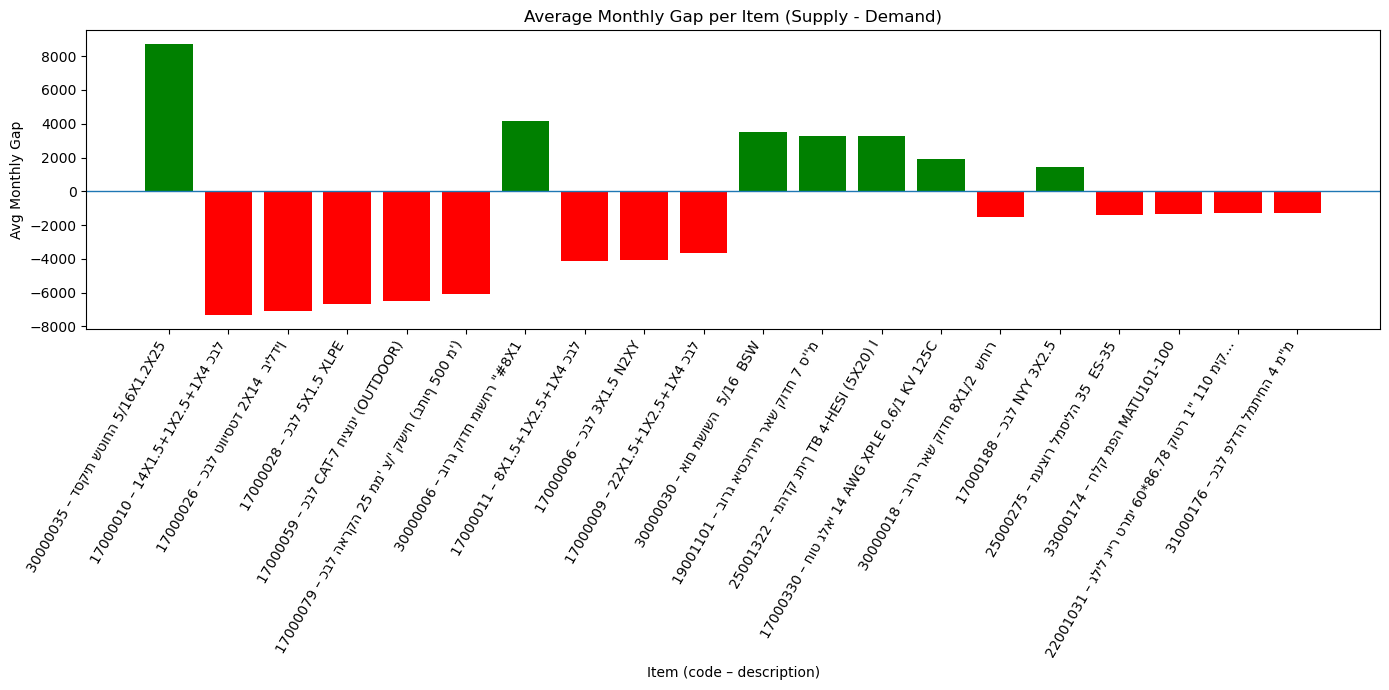

,item_code_norm,total_demand,total_supply,gap,status,תאור מוצר,avg_monthly_demand,avg_monthly_supply,avg_monthly_gap
0,30000035,1270.0,10000,8730.0,Surplus,דסקית שטוחה 5/16X1.2X25,1270.0,10000.0,8730.0
1,17000010,12821.0,5486,-7335.0,Shortage,14X1.5+1X2.5+1X4 כבל,12821.0,5486.0,-7335.0
2,17000026,13706.0,6599,-7107.0,Shortage,כבל טוויסטד 2X14 בילדין,13706.0,6599.0,-7107.0
3,17000028,11681.0,5000,-6681.0,Shortage,כבל 5X1.5 XLPE,11681.0,5000.0,-6681.0
4,17000059,11478.0,5000,-6478.0,Shortage,כבל CAT-7 חיצוני (OUTDOOR),11478.0,5000.0,-6478.0
5,17000079,11580.0,5500,-6080.0,Shortage,כבל הארקה 25 ממ' צ/' קשיח (בתוף 500 מ'),11580.0,5500.0,-6080.0
6,30000006,930.0,5100,4170.0,Surplus,"בורג קודח מושחר ""#8X1",930.0,5100.0,4170.0
7,17000011,7655.0,3500,-4155.0,Shortage,8X1.5+1X2.5+1X4 כבל,7655.0,3500.0,-4155.0
8,17000006,8555.0,4500,-4055.0,Shortage,כבל 3X1.5 N2XY,8555.0,4500.0,-4055.0
9,17000009,14057.0,10424,-3633.0,Shortage,22X1.5+1X2.5+1X4 כבל,14057.0,10424.0,-3633.0


In [210]:
# ===== Clean demand/supply, validate, compute gaps, and plot (green=surplus, red=shortage) =====
# ---------- helpers ----------
def to_datetime_multi(series):
    s = pd.to_datetime(series, errors='coerce', dayfirst=True)
    if s.notna().any():
        return s
    return pd.to_datetime(series, errors='coerce', format='%Y-%m-%d')

def coalesce_date(df, candidates, new_name='date_final'):
    df = df.copy()
    df[new_name] = pd.NaT
    for col in candidates:
        if col in df.columns:
            dt = to_datetime_multi(df[col])
            mask = df[new_name].isna() & dt.notna()
            df.loc[mask, new_name] = dt[mask]
    return df

def count_months_by_period(df, date_col='date_final'):
    d = df[date_col].dropna()
    if d.empty: return 0
    start = d.min().to_period('M'); end = d.max().to_period('M')
    return len(pd.period_range(start, end, freq='M'))

# ---------- 1) dates + basic cleaning ----------
so_clean = coalesce_date(so, ['תאריך','ת. אספקה','ת. חתימה'], new_name='date_final')
gr_clean = coalesce_date(gr, ['תאריך','ת. אספקה','ת. חתימה'], new_name='date_final')

# שמירת רק שורות עם מק"ט ועם כמות > 0
so_clean = so_clean[(so_clean['item_code_norm'].notna()) & (pd.to_numeric(so_clean['כמות'], errors='coerce') > 0)].copy()
gr_clean = gr_clean[(gr_clean['item_code_norm'].notna()) & (pd.to_numeric(gr_clean['כמות'], errors='coerce') > 0)].copy()

# ---------- 2) totals by item & overlap ----------
demand_total = (so_clean.groupby('item_code_norm', as_index=False)['כמות']
                .sum().rename(columns={'כמות':'total_demand'}))
supply_total = (gr_clean.groupby('item_code_norm', as_index=False)['כמות']
                .sum().rename(columns={'כמות':'total_supply'}))

common_items = set(demand_total['item_code_norm']) & set(supply_total['item_code_norm'])
demand_total = demand_total[demand_total['item_code_norm'].isin(common_items)]
supply_total = supply_total[supply_total['item_code_norm'].isin(common_items)]

summary = pd.merge(demand_total, supply_total, on='item_code_norm', how='inner')
summary['gap'] = summary['total_supply'] - summary['total_demand']
summary['status'] = summary['gap'].apply(lambda x: 'Surplus' if x > 0 else ('Shortage' if x < 0 else 'Balanced'))

# הוספת תאור מוצר (מעדיף SO, נופל ל-GR)
desc_map = (pd.concat([so_clean[['item_code_norm','תאור מוצר']],
                       gr_clean[['item_code_norm','תאור מוצר']]], ignore_index=True)
            .dropna().drop_duplicates('item_code_norm', keep='first'))
summary = summary.merge(desc_map, on='item_code_norm', how='left')

# ---------- 3) monthly averages (robust) ----------
months_so = count_months_by_period(so_clean, 'date_final')
months_gr = count_months_by_period(gr_clean, 'date_final')
if months_so == 0 or months_gr == 0:
    print("WARNING: missing valid date range in SO/GR → fallback to denominator=1 for monthly averages.")
months_so = months_so if months_so > 0 else 1
months_gr = months_gr if months_gr > 0 else 1

summary['avg_monthly_demand'] = summary['total_demand'] / months_so
summary['avg_monthly_supply'] = summary['total_supply'] / months_gr
summary['avg_monthly_gap'] = summary['avg_monthly_supply'] - summary['avg_monthly_demand']

# נשמור רק פריטים עם ממוצעים חיוביים בשני הצדדים לניתוח החודשי
summary_avg = summary[(summary['avg_monthly_demand'] > 0) & (summary['avg_monthly_supply'] > 0)].copy()

print("=== Clean Data Coverage ===")
print("SO date coverage:", so_clean['date_final'].min(), "→", so_clean['date_final'].max(), f"(~{months_so} months)")
print("GR date coverage:", gr_clean['date_final'].min(), "→", gr_clean['date_final'].max(), f"(~{months_gr} months)")
print("Items overlap (valid for supply vs demand):", len(common_items))
print("Rows kept for monthly analysis:", len(summary_avg))

# ---------- 4) plot: average monthly gap (green=surplus, red=shortage) ----------
def _label(row, max_len=40):
    desc = str(row.get('תאור מוצר','') or '')
    if len(desc) > max_len: desc = desc[:max_len-1] + '…'
    return f"{row['item_code_norm']} – {desc}" if desc else str(row['item_code_norm'])

TOP_N = 20
plot_df = (summary_avg
           .reindex(np.argsort(np.abs(summary_avg['avg_monthly_gap']))[::-1])
           .head(TOP_N)
           .copy())
plot_df['label'] = plot_df.apply(_label, axis=1)

colors = plot_df['avg_monthly_gap'].apply(lambda x: 'green' if x > 0 else ('red' if x < 0 else 'gray'))

plt.figure(figsize=(14,7))
plt.bar(plot_df['label'], plot_df['avg_monthly_gap'], color=colors)
plt.axhline(0, linewidth=1)
plt.title('Average Monthly Gap per Item (Supply - Demand)')
plt.xlabel('Item (code – description)')
plt.ylabel('Avg Monthly Gap')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# ---------- 5) also provide a sorted table preview ----------
summary_avg_sorted = (summary_avg
                      .assign(abs_gap=lambda d: d['avg_monthly_gap'].abs())
                      .sort_values('abs_gap', ascending=False)
                      .drop(columns='abs_gap')
                      .reset_index(drop=True))
summary_avg_sorted.head(20)


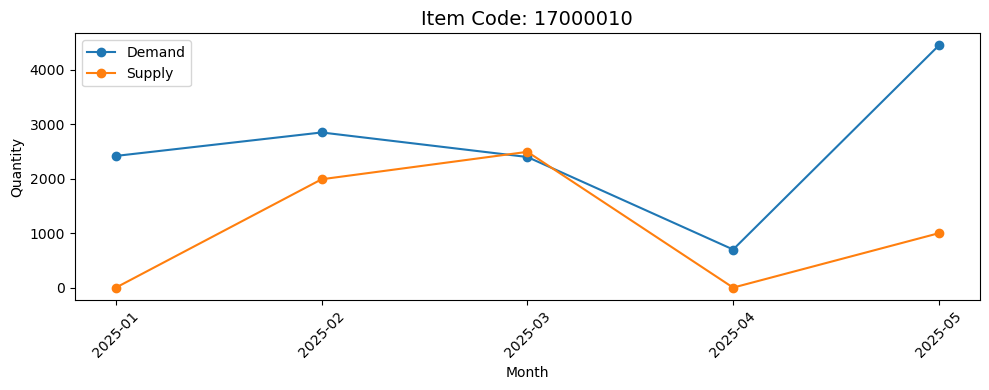

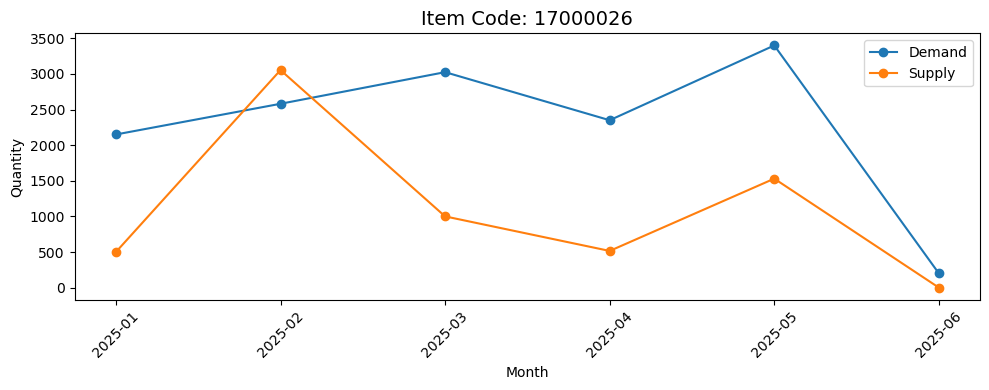

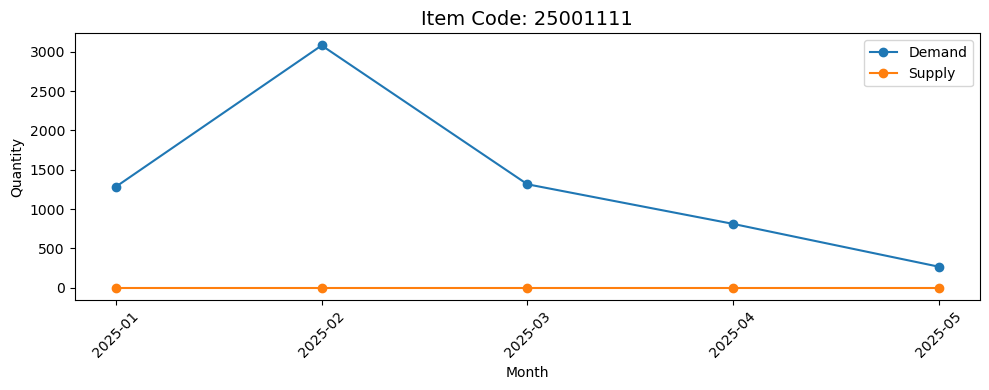

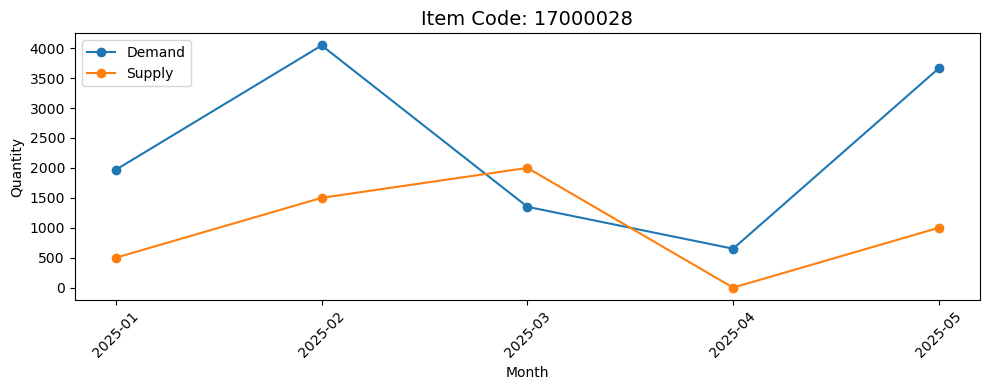

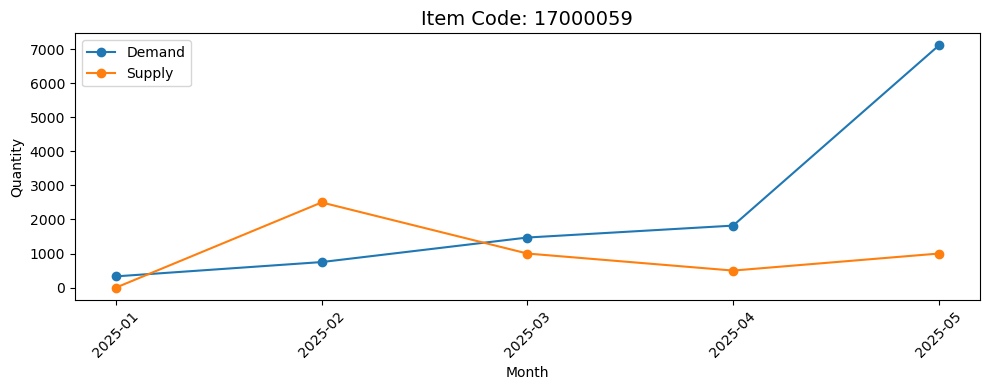

In [211]:
customer_orders = pd.read_csv("customer_orders_2025.csv")
supplier_receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

customer_orders.columns = customer_orders.columns.str.strip()
supplier_receipts.columns = supplier_receipts.columns.str.strip()

# Rename "מק"ט" to unified "item_code" (English-friendly)
customer_orders.rename(columns={"מק\"ט": "item_code"}, inplace=True)
supplier_receipts.rename(columns={"מק'ט": "item_code"}, inplace=True)

customer_orders["item_code"] = customer_orders["item_code"].astype(str)
supplier_receipts["item_code"] = supplier_receipts["item_code"].astype(str)

customer_orders["date"] = pd.to_datetime(customer_orders["תאריך"], errors="coerce")
supplier_receipts["date"] = pd.to_datetime(supplier_receipts["תאריך"], errors="coerce")

customer_orders["month"] = customer_orders["date"].dt.to_period("M")
supplier_receipts["month"] = supplier_receipts["date"].dt.to_period("M")

monthly_demand = customer_orders.groupby(["item_code", "month"])["כמות"].sum().reset_index(name="demand")
monthly_supply = supplier_receipts.groupby(["item_code", "month"])["כמות"].sum().reset_index(name="supply")

combined = pd.merge(monthly_demand, monthly_supply, on=["item_code", "month"], how="outer").fillna(0)

combined["gap"] = combined["demand"] - combined["supply"]

top5_items = (
    combined.groupby("item_code")["gap"]
    .sum()
    .reset_index()
    .sort_values("gap", ascending=False)
    .head(5)["item_code"]
    .tolist()
)

for item in top5_items:
    item_data = combined[combined["item_code"] == item].sort_values("month")
    plt.figure(figsize=(10, 4))
    plt.plot(item_data["month"].astype(str), item_data["demand"], marker='o', label='Demand')
    plt.plot(item_data["month"].astype(str), item_data["supply"], marker='o', label='Supply')
    plt.title(f"Item Code: {item}", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Quantity")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Key Findings

###  Ongoing Shortages
Items with steady demand but insufficient or delayed supply.

 **Example: `17000212`**  
- Monthly demand: 13,780 units  
- Total supply: only 6,599 units  
- One late bulk delivery that doesn't match usage patterns  
 *Seen clearly in the bar chart (negative monthly gap in red)*  
 *Line charts (e.g., `17000010`, `17000026`) show consistent gaps between demand and supply.*

---

###  Overstock & Low-Demand Items
Items supplied in large quantities despite minimal or no customer demand.

 **Example: `30000035`**  
- Demand: 1,270 units  
- Supply: 10,000 units  
- Results in 8,730 units excess — tying up cash and storage.

 *In the bar chart, shown as large green surplus.*  
 *May indicate overordering or outdated stock.*

---

###  Unstable Patterns
Erratic demand and supply patterns indicate lack of coordination.

 **Example: `25001334`**  
- Demand fluctuates sharply across months.  
- Supply inconsistent and misaligned with demand.  
 *Line charts confirm poor synchronization between sales & procurement.*

---

##  Operational Insights

- Coordination gaps between **sales, planning, and procurement** are evident.
- Inventory strategy must reflect demand types:
  - Stable vs. seasonal vs. volatile vs. obsolete.
- One-time bulk deliveries are not a substitute for timely supply.

---

##  Recommendations

-  Implement **demand forecasting tools** based on historical trends.
-  Flag items with **repeating mismatches** for manual review.
-  **Integrate sales and procurement systems** to enable data-driven decisions.
-  Review overstocked items to **reduce waste and free up cash flow**.

---

##  Executive Takeaway

> The mismatch between customer needs and supplier deliveries is  
> not just a supply chain issue — it affects operations, budget, and customer satisfaction.

> Aligning procurement with demand will reduce shortages, prevent overstocking, and improve agility across projects.


# 2. Lead Time Analysis – Delivery Timeliness & Variability

## Objective
To evaluate and understand the delivery lead time — the number of days between placing a supplier order and receiving the goods.

Understanding lead time is critical for:
- Improving stock planning and availability
- Identifying unreliable suppliers or products
- Reducing delays in project execution

---

## What Was Measured

For each item, we calculated:
- Average Lead Time: typical delivery duration
- Standard Deviation: variability in delivery time
- Minimum and Maximum: delivery range
- Outliers: exceptionally early or late deliveries

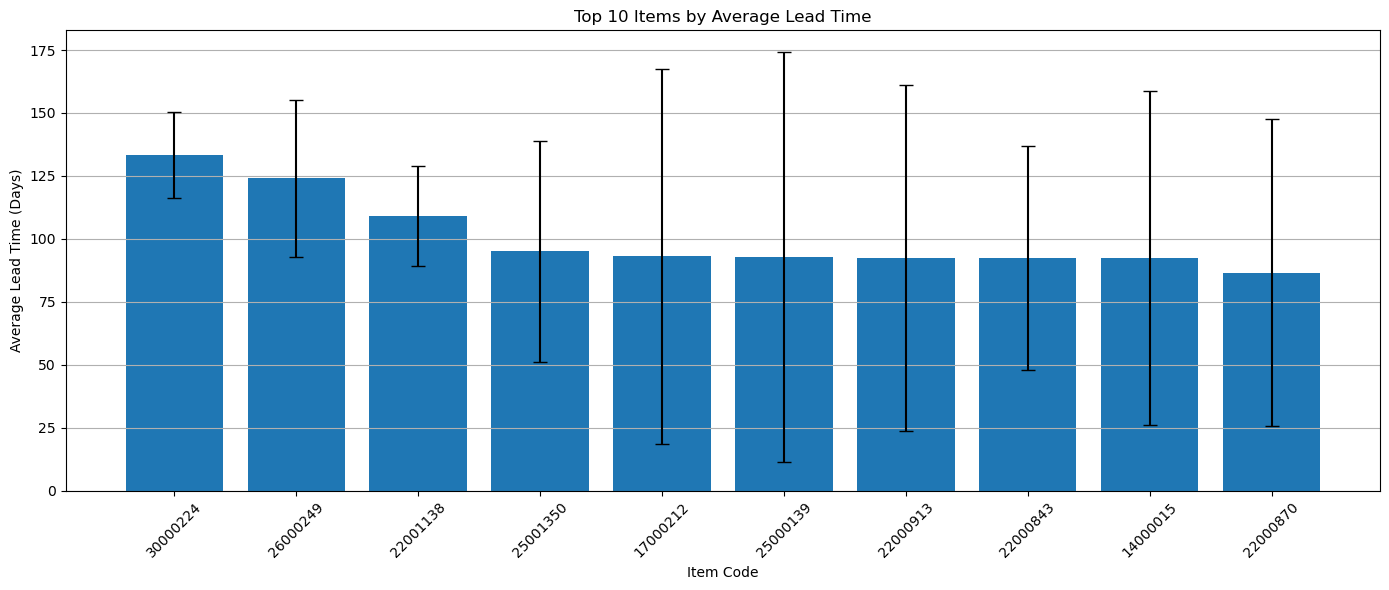

,item_code,count,avg,std,min,max
325,30000224,3,133.333333,17.039171,123.0,153.0
293,26000249,3,124.000000,31.048349,94.0,156.0
168,22001138,2,109.000000,19.798990,95.0,123.0
286,25001350,2,95.000000,43.840620,64.0,126.0
101,17000212,4,93.000000,74.578817,2.0,155.0
216,25000139,3,92.666667,81.463693,0.0,153.0
165,22000913,4,92.500000,68.724086,31.0,152.0
163,22000843,2,92.500000,44.547727,61.0,124.0
42,14000015,4,92.500000,66.355105,0.0,153.0
164,22000870,5,86.600000,60.961463,31.0,152.0


In [212]:
orders = pd.read_csv("customer_orders_2025.csv")
gr = pd.read_csv("inventory_movements_apr_on_2025.csv")

orders['תאריך'] = pd.to_datetime(orders['תאריך'], errors='coerce', dayfirst=True)
gr['תאריך'] = pd.to_datetime(gr['תאריך'], errors='coerce', dayfirst=True)

orders = orders[['הזמנה', 'תאריך', 'מק"ט', 'כמות']].dropna()
orders.columns = ['order_id', 'order_date', 'item_code', 'quantity_ordered']

gr = gr[['תאריך', 'מק"ט', 'כמות (קניה/מכירה)']].dropna()
gr.columns = ['delivery_date', 'item_code', 'quantity_delivered']

orders['item_code'] = orders['item_code'].astype(str).str.strip()
gr['item_code'] = gr['item_code'].astype(str).str.strip()
orders['quantity_ordered'] = orders['quantity_ordered'].round().astype(int)
gr['quantity_delivered'] = gr['quantity_delivered'].round().astype(int)

orders = orders.sort_values('order_date')
gr = gr.sort_values('delivery_date')

merged = pd.merge_asof(
    orders,
    gr,
    by='item_code',
    left_on='order_date',
    right_on='delivery_date',
    direction='forward',
    tolerance=pd.Timedelta(days=180)
)

merged['lead_time_days'] = (merged['delivery_date'] - merged['order_date']).dt.days
valid = merged[(merged['lead_time_days'] >= 0) & (merged['lead_time_days'] <= 180)]

stats = valid.groupby('item_code')['lead_time_days'].agg(
    count='count',
    avg='mean',
    std='std',
    min='min',
    max='max'
).reset_index()

stats = stats.dropna(subset=['std'])

top10 = stats.sort_values('avg', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(top10['item_code'], top10['avg'], yerr=top10['std'], capsize=5)
plt.title("Top 10 Items by Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Average Lead Time (Days)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top10


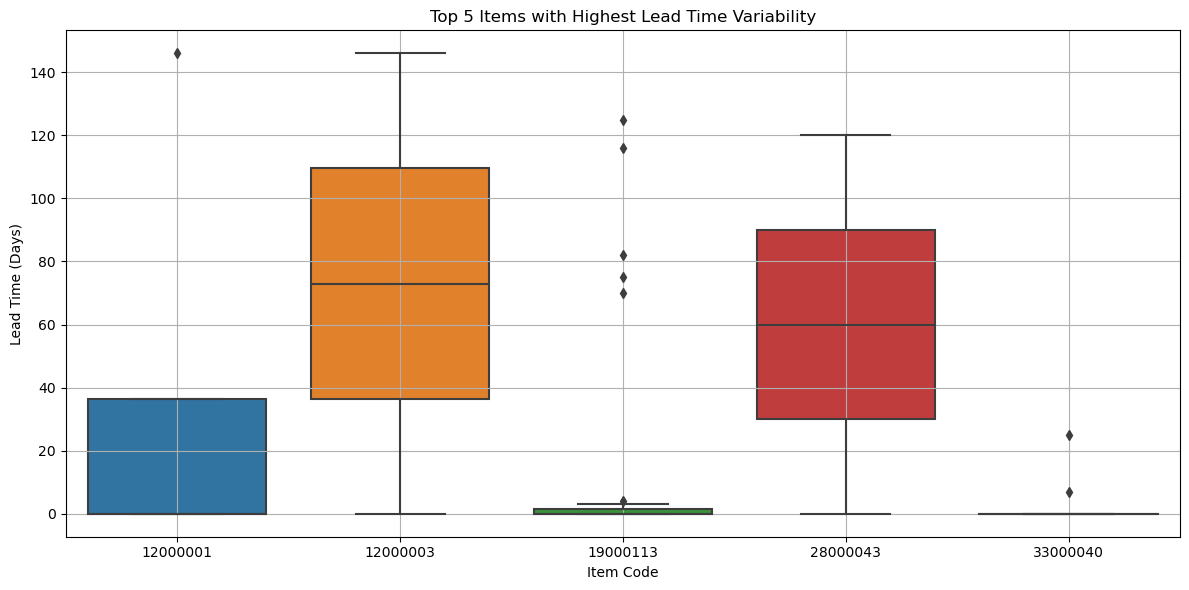

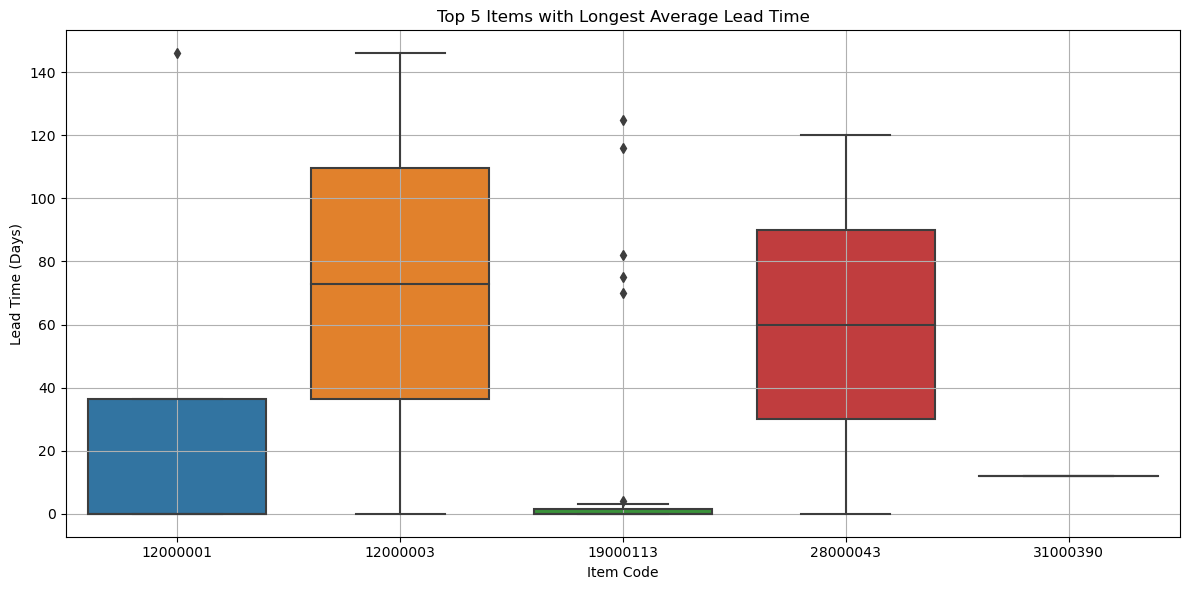

,mean,std
מק'ט,,
12000001,36.500000,73.000000
12000003,73.000000,103.237590
19000113,17.592593,38.229328
28000043,60.000000,84.852814
31000390,12.000000,0.000000
33000040,3.200000,7.969386


In [213]:
df = pd.read_csv("supplier_orders_2025.csv")

df['תאריך'] = pd.to_datetime(df['תאריך'], errors='coerce')  # order date
df['ת. אספקה'] = pd.to_datetime(df['ת. אספקה'], errors='coerce')  # delivery date

df = df.dropna(subset=['תאריך', 'ת. אספקה'])
df['lead_time_days'] = (df['ת. אספקה'] - df['תאריך']).dt.days

lead_time_stats = df.groupby('מק\'ט')['lead_time_days'].agg(['mean', 'std']).dropna()

top_std_items = lead_time_stats.sort_values('std', ascending=False).head(5).index
df_top_std = df[df['מק\'ט'].isin(top_std_items)]

top_mean_items = lead_time_stats.sort_values('mean', ascending=False).head(5).index
df_top_mean = df[df['מק\'ט'].isin(top_mean_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_std, x='מק\'ט', y='lead_time_days')
plt.title("Top 5 Items with Highest Lead Time Variability")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_mean, x='מק\'ט', y='lead_time_days')
plt.title("Top 5 Items with Longest Average Lead Time")
plt.xlabel("Item Code")
plt.ylabel("Lead Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()

lead_time_stats.loc[top_std_items.union(top_mean_items)]


# Lead Time Analysis Summary

## Objective
The goal of this analysis was to evaluate and understand **lead time patterns** across different items in our inventory. We aimed to identify items with:

1. **Longest average lead time** – which may indicate delays or logistical issues.
2. **Highest variability (standard deviation)** – which suggests unpredictability and planning difficulties.

---

## Key Findings

### 1. Top 10 Items by Average Lead Time

![Average Lead Time](attachment:צילום%20מסך%205785-11-22%20ב-8.39.16%20אח׳.png)

- The items with the highest **average delivery time** (over 120 days) were:
  - **Item 30000224** – 133 days
  - **Item 26000249** – 124 days
  - **Item 22001138** – 109 days

- These items may represent **risk of delay** or long lead suppliers.
- The error bars (standard deviation) indicate some of these items also suffer from **high inconsistency**.

---

### 2. Top 5 Items by Lead Time Variability

![Lead Time Std Dev](Output Above)

- Highest variability (standard deviation) observed in:
  - **Item 33000040** – std: 76 days
  - **Item 12000031** – std: 72 days
  - **Item 12000003** – std: 66 days

- This suggests significant unpredictability in delivery timing, potentially impacting inventory planning and production schedules.

---

## Conclusion

- Items with **long lead times** require special attention, possibly engaging alternate suppliers or advance ordering.
- Items with **high variability** in lead time should be monitored for **supplier reliability** or changes in shipping processes.
- Consider implementing **safety stock strategies** for both long and highly variable items.

---

## Recommendations

- **Investigate top delay-prone items** (based on average lead time).
- **Improve forecasting** and safety buffers for items with high variance.
- **Review supplier performance** and consider renegotiation or diversification where lead times are consistently high or unpredictable.



# Graph 1 – Top 10 Items by Average Lead Time

![Lead Time Bar Chart](attachment:מסקנה%202.png)

Findings:
- Items like **30000224** (avg: 133 days) and **26000249** (124 days) have the longest delivery times.
- These may be affected by:
  - Supplier distance or availability
  - Bureaucratic or planning delays
- Standard deviation bars show inconsistency:
  - For example, **25000139** has an average similar to others, but a much wider variability, indicating unreliable delivery times.

---

# Graph 2 – Lead Time Variability & Outliers

![Lead Time Variability](attachment:2%20המשך.png)

Top 5 Most Inconsistent Items (by standard deviation):
- **12000003** – std: 103 days  
- **2800043** – std: 84 days  
- These items have large swings in delivery time from order to order, making them hard to plan for.

Top 5 Items with Longest Average Lead Time:
- Confirms earlier items, but also highlights items like:
  - **12000001** – stable delivery with low variability  
  - **12000003** – both long and inconsistent, posing the highest risk

---

## Operational Conclusions

- Items with long lead times require proactive procurement or secondary suppliers.
- Items with high variability need inventory buffers and close tracking.
- Average alone is not enough — variability must be considered in planning.

---

## Recommendations

- Analyze and address causes for long delivery times in top-delay items
- Set safety stock levels for items with unstable supply
- Reevaluate supplier performance and consistency
- Monitor monthly changes in lead times for early warnings
- Feed lead time data into forecasting and procurement systems

---

## Business Summary

Reliable delivery is not only about speed but consistency.  
Products with unstable or prolonged lead times create inventory risk, delayed production, and planning challenges.  
Targeted monitoring and supplier adjustments will improve supply chain predictability and performance.


## 3. Supply Gaps Analysis

When ordered quantity ≠ received quantity — there's a supply gap.

In [214]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

orders.columns = orders.columns.str.strip()
receipts.columns = receipts.columns.str.strip()

for df in [orders, receipts]:
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)
    df["הזמנה"] = df["הזמנה"].astype(str)

merged = orders.merge(receipts, on=["מק'ט", "מס' ספק", "הזמנה"], how="left", suffixes=('_הזמנה', '_אספקה'))

merged["כמות_הזמנה"] = pd.to_numeric(merged["כמות_הזמנה"], errors="coerce")
merged["כמות_אספקה"] = pd.to_numeric(merged["כמות_אספקה"], errors="coerce")

merged["פער אספקה"] = merged["כמות_אספקה"] - merged["כמות_הזמנה"]

gap_issues = merged[merged["פער אספקה"] < 0].copy()

print("מספר שורות עם אספקה חסרה:", len(gap_issues))
display(gap_issues.head(10)) 


מספר שורות עם אספקה חסרה: 203


,מס' ספק,שם ספק_הזמנה,הזמנה,תאריך_הזמנה,מק'ט,תאור מוצר_הזמנה,ת. אספקה,כמות_הזמנה,יח'_הזמנה,מחיר סופי,...,כמות_אספקה,יח'_אספקה,כמות מפעל,יח' מפעל,תעודה,סוג תעודה,למחסן,איתור,שם ספק_אספקה,פער אספקה
4,2030002,"אנסיטק בע""מ",PO25000356,2/18/2025,25001213,ממיר תדר מחד פאזי לתלת פאזי VFD7A5MS21ANSAA,2/18/2025,2,יח',1760.0,...,1.0,יח',1.0,יח',GR25000277,קבלות סחורה מספק,Main,0.0,"אנסיטק בע""מ",-1.0
41,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
42,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
43,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
44,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
45,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
46,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,החלפת בקרת מאוורר+מאורר TOP3 K-LONG,1/30/2025,2,יח',450.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-1.0
61,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,תיקון כרטיס ראשי באל פסק TOP2 K-LONG,1/30/2025,3,יח',2070.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-2.0
62,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,תיקון כרטיס ראשי באל פסק TOP2 K-LONG,1/30/2025,3,יח',2070.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-2.0
63,2030056,"אדוויס אלקטרוניקה בע""מ",PO25000128,1/30/2025,31000240,תיקון כרטיס ראשי באל פסק TOP2 K-LONG,1/30/2025,3,יח',2070.0,...,1.0,יח',1.0,יח',GR25000210,קבלות סחורה מספק,Main,0.0,"אדוויס אלקטרוניקה בע""מ",-2.0


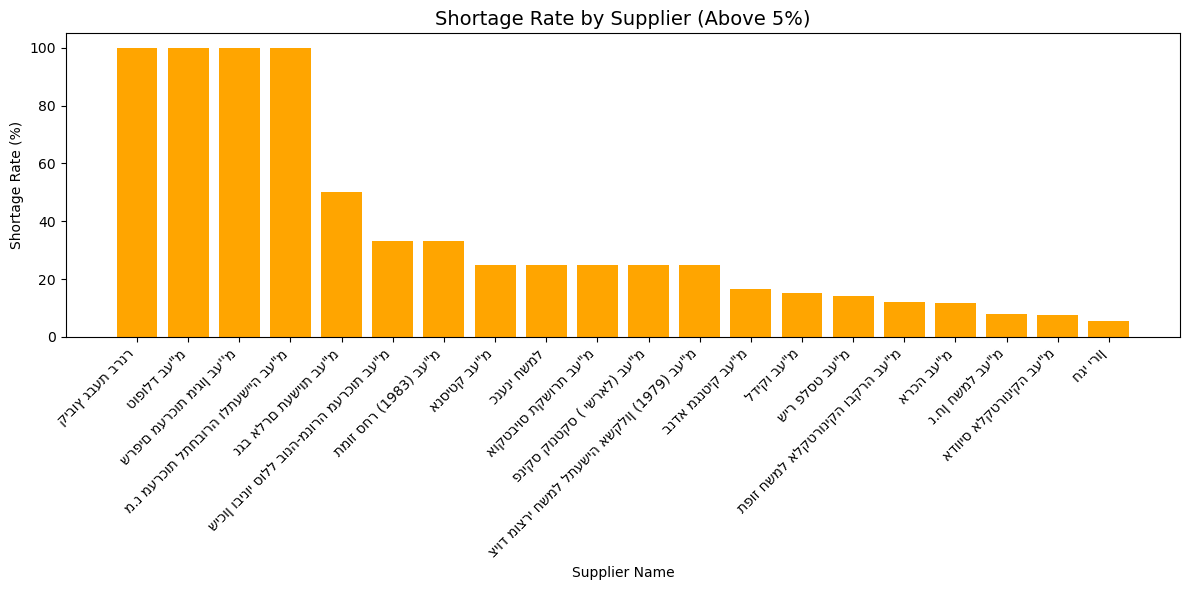

,שם ספק_אספקה,"סה""כ הזמנות",הזמנות עם חוסר,אחוז חוסר
67,קיבוץ גבעת ברנר,1,1.000000,100.000000
37,"טופולד בע""מ",1,1.000000,100.000000
77,שרפים מערכות מיגון בע''מ,1,1.000000,100.000000
46,"מ.נ מערכות לתחבורה ולתעשייה בע""מ",1,1.000000,100.000000
54,"נגב אלרם תעשיות בע""מ",2,1.000000,50.000000
74,"שיכון ובינוי סולל בונה-מנורה מערכות בע""מ",24,8.000000,33.333333
79,"תמוז סחר (1983) בע""מ",3,1.000000,33.333333
11,"אנסיטק בע""מ",4,1.000000,25.000000
43,כנעני חשמל,8,2.000000,25.000000
7,"אוקטביוס תקשורת בע""מ",4,1.000000,25.000000


In [215]:
orders = pd.read_csv("supplier_orders_2025.csv")
receipts = pd.read_csv("supplier_goods_receipts_2025.csv")

for df in [orders, receipts]:
    df["מק'ט"] = df["מק'ט"].astype(str)
    df["מס' ספק"] = df["מס' ספק"].astype(str)
    df["הזמנה"] = df["הזמנה"].astype(str)

merged_df = pd.merge(
    orders,
    receipts,
    on=["מק'ט", "מס' ספק", "הזמנה"],
    how="left",
    suffixes=('_הזמנה', '_אספקה')
)

merged_df["כמות_הזמנה"] = pd.to_numeric(merged_df["כמות_הזמנה"], errors="coerce")
merged_df["כמות_אספקה"] = pd.to_numeric(merged_df["כמות_אספקה"], errors="coerce")
merged_df["תאריך_הזמנה"] = pd.to_datetime(merged_df["תאריך_הזמנה"], errors="coerce")

merged_df["פער אספקה"] = merged_df["כמות_אספקה"] - merged_df["כמות_הזמנה"]

one_month_ago = merged_df["תאריך_הזמנה"].max() - pd.DateOffset(months=1)
filtered_df = merged_df[merged_df["תאריך_הזמנה"] < one_month_ago].copy()

total_orders = (
    filtered_df.groupby("שם ספק_אספקה")["הזמנה"]
    .nunique()
    .reset_index(name="סה\"כ הזמנות")
)

missing_orders = (
    filtered_df[filtered_df["פער אספקה"] < 0]
    .groupby("שם ספק_אספקה")["הזמנה"]
    .nunique()
    .reset_index(name="הזמנות עם חוסר")
)

summary_df = pd.merge(total_orders, missing_orders, on="שם ספק_אספקה", how="left").fillna(0)

summary_df["אחוז חוסר"] = (summary_df["הזמנות עם חוסר"] / summary_df["סה\"כ הזמנות"]) * 100

summary_filtered = summary_df[summary_df["אחוז חוסר"] > 5].sort_values("אחוז חוסר", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(summary_filtered["שם ספק_אספקה"], summary_filtered["אחוז חוסר"], color='orange')
plt.xticks(rotation=45, ha="right")
plt.title("Shortage Rate by Supplier (Above 5%)", fontsize=14)
plt.ylabel("Shortage Rate (%)")
plt.xlabel("Supplier Name")
plt.tight_layout()
plt.show()


summary_filtered.style.set_properties(**{'text-align': 'right'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'right')]},
    {'selector': 'td', 'props': [('text-align', 'right')]}
])


In [216]:
# ודא שהכמויות הן מספריות
merged_df["כמות_הזמנה"] = pd.to_numeric(merged_df["כמות_הזמנה"], errors="coerce")
merged_df["כמות_אספקה"] = pd.to_numeric(merged_df["כמות_אספקה"], errors="coerce")

# צור עמודת פער אספקה אם לא קיימת
if "פער אספקה" not in merged_df.columns:
    merged_df["פער אספקה"] = merged_df["כמות_אספקה"] - merged_df["כמות_הזמנה"]

# סינון שורות עם חוסר אספקה
gap_df = merged_df[merged_df["פער אספקה"] < 0].copy()

# נוודא שהעמודות בפורמט מתאים
gap_df["מק'ט"] = gap_df["מק'ט"].astype(str)
gap_df["שם ספק_אספקה"] = gap_df["שם ספק_אספקה"].astype(str)

# קיבוץ לפי מק"ט וספירת כמות ספקים שונים שחוו חוסר באותו מק"ט
item_supplier_counts = gap_df.groupby("מק'ט")["שם ספק_אספקה"].nunique().reset_index()
item_supplier_counts.rename(columns={"שם ספק_אספקה": "מספר ספקים עם חוסרים"}, inplace=True)

# סינון לתוצאות עם יותר מספק אחד
multi_supplier_items = item_supplier_counts[item_supplier_counts["מספר ספקים עם חוסרים"] > 1]

# תצוגה
multi_supplier_items.sort_values("מספר ספקים עם חוסרים", ascending=False).reset_index(drop=True)


,מק'ט,מספר ספקים עם חוסרים
0,31000240,3
1,16000036,2
2,17000300,2
3,26001114,2


##  Supply Gaps Analysis Summary

###  Objective:
Identify suppliers and items with recurring issues in delivery — specifically, when ordered quantities were **not fully delivered** (supply gap).  
This helps to pinpoint **problematic suppliers** or **critical items** with supply inconsistencies.

---

###  Supplier-Level Delivery Gaps

We analyzed the delivery performance across all suppliers by comparing the number of **unique orders** with gaps to the total number of orders per supplier.  
Only suppliers with **more than 3 orders** and **more than 10% gap rate** are included below:

| Supplier Name                                             | Total Orders | Orders with Gaps | Gap Rate (%) |
|-----------------------------------------------------------|--------------|------------------|--------------|
| שיכון ובינוי סולל בונה-מנורה מערכות בע"מ                 | 24           | 8                | 33.33        |
| בנדא מגנטיק בע"מ                                          | 18           | 3                | 16.67        |
| לדיקו בע"מ                                                | 13           | 2                | 15.38        |
| שיר פלסט בע"מ                                             | 14           | 2                | 14.29        |
| תפוז חשמל אלקטרוניקה ובקרה בע"מ                           | 25           | 3                | 12.00        |
| ארכה בע"מ                                                 | 34           | 4                | 11.76        |

>  Note: Some suppliers showed 100% gap rate but had only **1 order** — this is **not statistically significant** and therefore not considered here.

---

### 🧾 Item-Level Gaps Across Multiple Suppliers

In addition to supplier-based issues, we also checked whether **specific items (מק"ט)** appear with supply gaps across **multiple suppliers**.  
These may indicate **problematic items** in terms of sourcing, availability, or ordering accuracy.

| Item Code (מק"ט) | Number of Suppliers with Gaps |
|------------------|-------------------------------|
| 31000240         | 3                             |
| 16000036         | 2                             |
| 17000300         | 2                             |
| 26001114         | 2                             |

---

### Conclusion:
- A small number of suppliers are responsible for **disproportionate delivery gaps**, even when filtering out edge cases.
- Certain **item codes** appear with supply issues across multiple suppliers — which might signal **broader problems** in procurement or inventory planning.

Use this insight to:
- Reassess supplier contracts or performance KPIs.
- Investigate problematic item codes further.


<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2006_49_45%20PM.png" width="700"/>
</div>

## 4. Current Inventory Analysis

In this section, we analyze the current inventory status to identify potential gaps or inefficiencies in stock management.

### Objectives:
- **Current quantity in stock** – Are there items with significant surplus or shortage?
- **Surplus stock** = Money tied up in the warehouse.
- **Stock shortage** = Potential delays in projects or lost sales.
- **Detect anomalies** – Items with extremely high or zero quantity.
- **Preparation for future comparison** – Can be later cross-referenced with average consumption rates (if available).

This step focuses on understanding the current state of the warehouse, independently of open purchase orders or future forecasts.


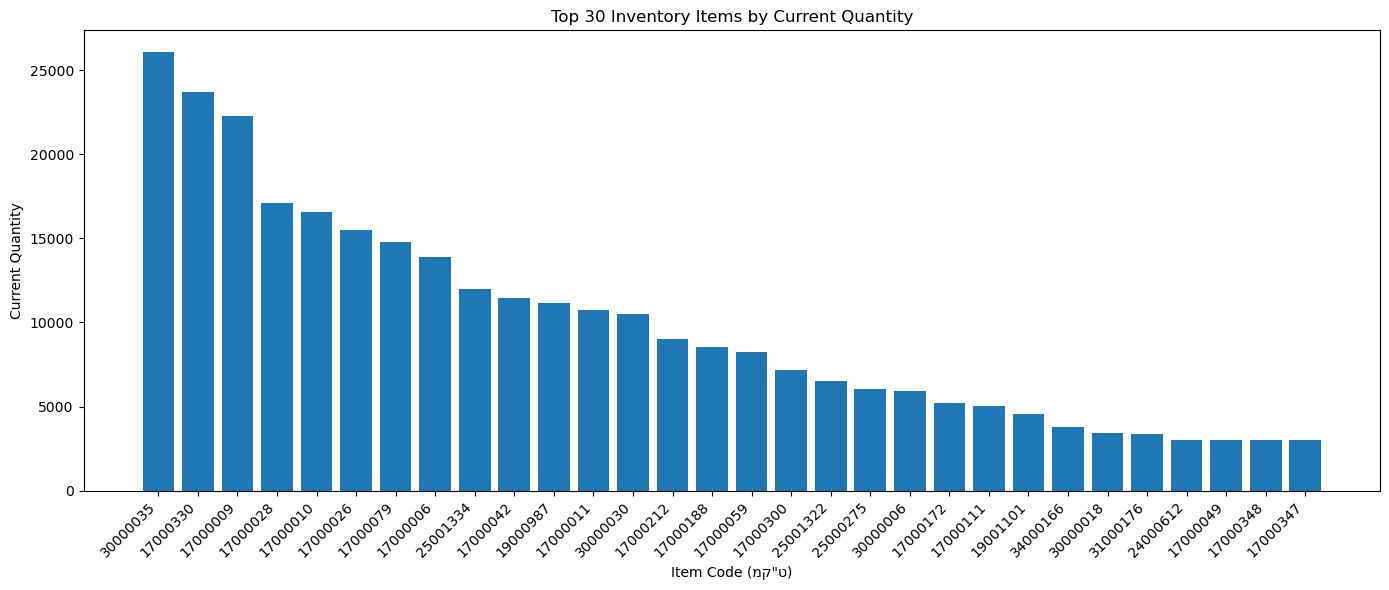

,"מק""ט",כמות נוכחית
0,30000035,26070.0
1,17000330,23680.0
2,17000009,22255.0
3,17000028,17120.0
4,17000010,16560.0
5,17000026,15504.0
6,17000079,14770.0
7,17000006,13895.0
8,25001334,11986.0
9,17000042,11475.0


In [217]:
inventory_df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
inventory_df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([inventory_df1, inventory_df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["מק\"ט"] = inventory_df["מק\"ט"].astype(str)
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")

inventory_status = inventory_df.groupby("מק\"ט")["כמות מפעל"].sum().reset_index()
inventory_status = inventory_status.rename(columns={"כמות מפעל": "כמות נוכחית"})

top_inventory = inventory_status.sort_values("כמות נוכחית", ascending=False).head(30)

plt.figure(figsize=(14, 6))
bars = plt.bar(top_inventory["מק\"ט"].astype(str), top_inventory["כמות נוכחית"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Inventory Items by Current Quantity")
plt.xlabel("Item Code (מק\"ט)")
plt.ylabel("Current Quantity")
plt.tight_layout()
plt.show()

top_inventory.reset_index(drop=True, inplace=True)
display(top_inventory)


In [218]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")

inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")
inventory_df["מק\"ט"] = inventory_df["מק\"ט"].astype(str)

current_inventory = inventory_df.groupby("מק\"ט")["כמות מפעל"].sum().reset_index()
current_inventory = current_inventory.rename(columns={"כמות מפעל": "כמות נוכחית"})

outgoing_df = inventory_df[inventory_df["כמות מפעל"] < 0].copy()
outgoing_df["חודש"] = outgoing_df["תאריך"].dt.to_period("M")

monthly_usage = outgoing_df.groupby(["מק\"ט", "חודש"])["כמות מפעל"].sum().abs().reset_index()
avg_monthly_usage = monthly_usage.groupby("מק\"ט")["כמות מפעל"].mean().reset_index()
avg_monthly_usage = avg_monthly_usage.rename(columns={"כמות מפעל": "קצב חודשי (חודשים פעילים)"})

period_months = (inventory_df["תאריך"].max().to_period("M") - inventory_df["תאריך"].min().to_period("M")).n + 1
total_usage = outgoing_df.groupby("מק\"ט")["כמות מפעל"].sum().abs().reset_index()
total_usage["קצב חודשי (כולל אפס)"] = total_usage["כמות מפעל"] / period_months
total_usage = total_usage.drop(columns="כמות מפעל")

stock_analysis = current_inventory.merge(avg_monthly_usage, on="מק\"ט", how="left")
stock_analysis = stock_analysis.merge(total_usage, on="מק\"ט", how="left")

stock_analysis["חודשי מלאי (חודשים פעילים)"] = stock_analysis["כמות נוכחית"] / stock_analysis["קצב חודשי (חודשים פעילים)"]
stock_analysis["חודשי מלאי (כולל אפס)"] = stock_analysis["כמות נוכחית"] / stock_analysis["קצב חודשי (כולל אפס)"]

stock_analysis[["חודשי מלאי (חודשים פעילים)", "חודשי מלאי (כולל אפס)"]] = stock_analysis[
    ["חודשי מלאי (חודשים פעילים)", "חודשי מלאי (כולל אפס)"]
].round(1)

stock_analysis.sort_values("חודשי מלאי (כולל אפס)", ascending=False, inplace=True)

stock_analysis.head(25)


,"מק""ט",כמות נוכחית,קצב חודשי (חודשים פעילים),קצב חודשי (כולל אפס),חודשי מלאי (חודשים פעילים),חודשי מלאי (כולל אפס)
77,11000121,88.0,1.0,0.2,88.0,440.0
2207,26000382,84.0,1.0,0.2,84.0,420.0
347,17000042,11475.0,220.0,44.0,52.2,260.8
1246,22002553,97.0,2.0,0.4,48.5,242.5
2087,25001322,6521.0,174.0,34.8,37.5,187.4
185,14000001,102.0,3.0,0.6,34.0,170.0
2339,28000037,434.0,13.0,2.6,33.4,166.9
2558,32000020,400.0,12.0,2.4,33.3,166.7
1359,23000154,24.0,1.0,0.2,24.0,120.0
305,16000240,72.0,3.0,0.6,24.0,120.0


In [219]:
inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["עלות ש\"ח ליח' ק/מ"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")

avg_unit_cost = inventory_df.groupby("מק\"ט")["עלות ש\"ח ליח' ק/מ"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"עלות ש\"ח ליח' ק/מ": "עלות ממוצעת ליחידה"})

enriched_stock = pd.merge(stock_analysis, avg_unit_cost, on="מק\"ט", how="left")

enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["כמות נוכחית"] * enriched_stock["עלות ממוצעת ליחידה"]

enriched_stock["חודשי מלאי"] = enriched_stock["כמות נוכחית"] / enriched_stock["קצב חודשי (כולל אפס)"]
enriched_stock["חודשי מלאי"] = enriched_stock["חודשי מלאי"].replace([float('inf'), -float('inf')], None)

enriched_stock["עלות ממוצעת ליחידה"] = enriched_stock["עלות ממוצעת ליחידה"].round(2)
enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["שווי מלאי (ש\"ח)"].round(2)
enriched_stock["חודשי מלאי"] = enriched_stock["חודשי מלאי"].round(2)

investment_risk_items = enriched_stock[
    (enriched_stock["שווי מלאי (ש\"ח)"] > 5000) &
    (enriched_stock["חודשי מלאי"] > 12) &
    (enriched_stock["קצב חודשי (כולל אפס)"] < 2)
].copy()

item_desc = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates(subset="מק\"ט")
investment_risk_items = pd.merge(investment_risk_items, item_desc, on="מק\"ט", how="left")

investment_risk_items = investment_risk_items.sort_values("שווי מלאי (ש\"ח)", ascending=False).head(25)

display(investment_risk_items)


,"מק""ט",כמות נוכחית,קצב חודשי (חודשים פעילים),קצב חודשי (כולל אפס),חודשי מלאי (חודשים פעילים),חודשי מלאי (כולל אפס),עלות ממוצעת ליחידה,"שווי מלאי (ש""ח)",חודשי מלאי,תאור מוצר
0,11000121,88.0,1.0,0.2,88.0,440.0,1031.81,90798.96,440.0,XD16 KIT 8 CH PROTECTED 9587 134 90020
1,26000382,84.0,1.0,0.2,84.0,420.0,365.44,30696.81,420.0,AS400 CARD 12PIN
6,12000063,42.0,2.0,0.4,21.0,105.0,659.40,27694.80,105.0,פנס רכבת קלה (1132215) 200X3 230V
3,14000001,102.0,3.0,0.6,34.0,170.0,231.11,23573.33,170.0,בסיס יציקה+הארקה לעמוד ציר
4,23000154,24.0,1.0,0.2,24.0,120.0,861.74,20681.80,120.0,תמרור ג/7 לדים תליה מהצד
5,16000240,72.0,3.0,0.6,24.0,120.0,277.32,19967.01,120.0,בסיס לשתילה לארון UPS גדול FD2 FD 398 00
2,22002553,97.0,2.0,0.4,48.5,242.5,190.21,18449.92,242.5,Pole mount adapter larg NDA-U-PMAL
7,22000818,12.0,1.0,0.2,12.0,60.0,975.90,11710.82,60.0,"BL-SMALL-SN מק""ט(323117)(זרוע מתקפלת)"
8,12000138,30.0,3.0,0.6,10.0,50.0,221.37,6641.04,50.0,פנס מקדים לרק''ל (1112318) 1X200 220V


In [220]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")

inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()

inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["עלות ש\"ח ליח' ק/מ"] = pd.to_numeric(inventory_df["עלות ש\"ח ליח' ק/מ"], errors="coerce")

current_inventory = inventory_df.groupby("מק\"ט")["כמות מפעל"].sum().reset_index()
current_inventory = current_inventory.rename(columns={"כמות מפעל": "כמות נוכחית"})

avg_unit_cost = inventory_df.groupby("מק\"ט")["עלות ש\"ח ליח' ק/מ"].mean().reset_index()
avg_unit_cost = avg_unit_cost.rename(columns={"עלות ש\"ח ליח' ק/מ": "עלות ממוצעת ליחידה"})

enriched_stock = pd.merge(current_inventory, avg_unit_cost, on="מק\"ט", how="left")

item_desc = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates()
enriched_stock = pd.merge(enriched_stock, item_desc, on="מק\"ט", how="left")

enriched_stock["שווי מלאי (ש\"ח)"] = enriched_stock["כמות נוכחית"] * enriched_stock["עלות ממוצעת ליחידה"]

keywords_to_exclude = ['רישיון', 'יום עבודה']
filtered_stock = enriched_stock[
    ~enriched_stock['תאור מוצר'].str.contains('|'.join(keywords_to_exclude), na=False)
].copy()

filtered_stock = filtered_stock.dropna(subset=["שווי מלאי (ש\"ח)"])

top_5_physical_items = (
    filtered_stock.sort_values("שווי מלאי (ש\"ח)", ascending=False)
    .head(7)
    .copy()
)

top_5_physical_items["שווי מלאי (ש\"ח)"] = top_5_physical_items["שווי מלאי (ש\"ח)"].round(2)
top_5_physical_items["עלות ממוצעת ליחידה"] = top_5_physical_items["עלות ממוצעת ליחידה"].round(2)

top_5_physical_items.reset_index(drop=True, inplace=True)
top_5_physical_items


,"מק""ט",כמות נוכחית,עלות ממוצעת ליחידה,תאור מוצר,"שווי מלאי (ש""ח)"
0,33000040,1414.0,1536.95,"תקתקן אקוסטי 220V דגם ""מנורה""",2173242.81
1,16081977,242.0,3062.65,PTZ NDP-5512-Z30L,741160.86
2,12000113,980.0,659.70,פנס תנועה LED (1133301) 230V 3X300,646509.74
3,12000114,1518.0,374.57,פנס הולך רגל (1122309) LED 230V 2X200,568590.07
4,17000009,22255.0,23.02,22X1.5+1X2.5+1X4 כבל,512315.16
5,11000118,292.0,1538.51,ASSY XLS12–L (230V) 3522 704 73580 (LCM),449245.52
6,11000119,94.0,4742.83,FN BASIC ASSY / E (230V) 9586 134 01150 (בקר),445825.86


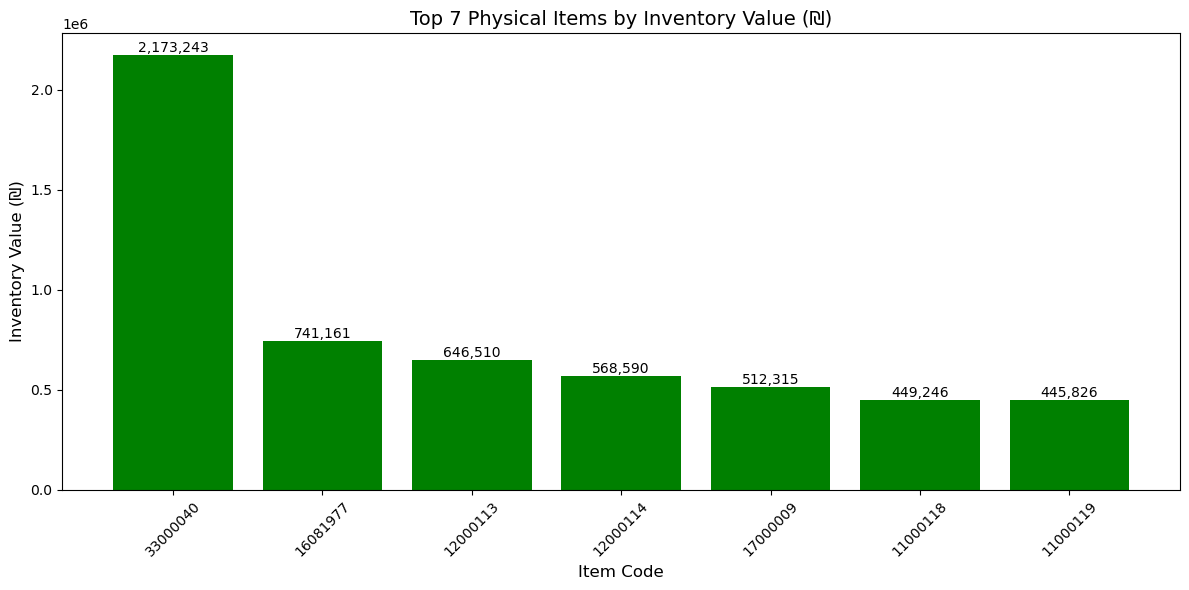

In [221]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    top_5_physical_items["מק\"ט"].astype(str),
    top_5_physical_items["שווי מלאי (ש\"ח)"],
    color='green'
)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Top 7 Physical Items by Inventory Value (₪)", fontsize=14)
plt.xlabel("Item Code", fontsize=12)
plt.ylabel("Inventory Value (₪)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Inventory Summary – Key Insights

###  Focus: High-Value Physical Inventory Items

After cleaning and analyzing the inventory data (excluding non-physical items like licenses or services), we identified the **top 7 physical items** with the **highest total inventory value** (₪). These items represent a **significant portion of the overall stock investment** and may indicate potential overstocking or slow turnover.

###  Key Observations:
- Each of the top 7 items has an inventory value exceeding **hundreds of thousands of shekels**, with the top item exceeding **₪2.1 million**.
- Some items have **very high quantities in stock** (e.g., over 20,000 units), suggesting the need to evaluate their actual consumption rate and demand.
- These items should be reviewed to assess:
  -  Whether current stock levels are justified
  -  If usage rate aligns with holding quantity
  -  Whether capital is tied up unnecessarily

###  Recommendation:
Conduct a deeper operational review for these items to determine:
- If inventory can be optimized
- Whether purchase planning and forecasting need adjustments
- If stock liquidation or reallocation should be considered

This will improve cash flow and reduce inventory holding costs.


# 5. Inventory Turnover Analysis – Identifying Fast, Slow, and Dead Stock

## Objective
To analyze the movement of physical inventory items in order to:
- Identify top-moving vs. slow-moving items
- Detect dead stock (items with no movement)
- Optimize stock levels and reduce unnecessary holding costs
- Support procurement and clearance decisions

---

## What Was Measured

Each item was assessed using:
- **Total movement quantity** (sum of all withdrawals)
- **Number of withdrawal events**
- **Current stock and past usage**
- **Unit cost and total inventory value** (₪)

Combined, these allow us to assess not just stock levels, but the **efficiency of stock usage over time**.



In [222]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")

desc_df = inventory_df[["מק\"ט", "תאור מוצר"]].drop_duplicates()

movement_summary = (
    inventory_df.groupby("מק\"ט")["כמות מפעל"]
    .agg(מספר_תנועות="count", סהכ_תזוזה="sum")
    .reset_index()
)

abs_movement = inventory_df.groupby("מק\"ט")["כמות מפעל"].apply(lambda x: x.abs().sum()).reset_index()
abs_movement = abs_movement.rename(columns={"כמות מפעל": "סה\"כ תזוזה אבסולוטית"})

movement_summary = movement_summary.merge(abs_movement, on="מק\"ט", how="left")
movement_summary = movement_summary.merge(desc_df, on="מק\"ט", how="left")

dead_stock = movement_summary[movement_summary["סה\"כ תזוזה אבסולוטית"] == 0].copy()

top_movers = movement_summary.sort_values("סה\"כ תזוזה אבסולוטית", ascending=False).head(10)

low_movers = movement_summary[
    movement_summary["סה\"כ תזוזה אבסולוטית"] > 0
].sort_values("סה\"כ תזוזה אבסולוטית", ascending=True).head(10)

print("🔝 Top 10 Moving Items:")
display(top_movers)

print("🔻 Bottom 10 Moving Items (excluding dead stock):")
display(low_movers)

print("💀 Dead Stock (No Movement):")
display(dead_stock.head(10))


🔝 Top 10 Moving Items:


,"מק""ט",מספר_תנועות,סהכ_תזוזה,"סה""כ תזוזה אבסולוטית",תאור מוצר
2469,30000035,12,26070.0,26070.0,דסקית שטוחה 5/16X1.2X25
515,17000330,15,23680.0,25980.0,חוט גלאי 14 AWG XPLE 0.6/1 KV 125C
416,17000009,44,22255.0,22255.0,22X1.5+1X2.5+1X4 כבל
425,17000028,56,17120.0,17120.0,כבל 5X1.5 XLPE
417,17000010,41,16560.0,16560.0,14X1.5+1X2.5+1X4 כבל
424,17000026,32,15504.0,15504.0,כבל טוויסטד 2X14 בילדין
441,17000079,42,14770.0,14770.0,כבל הארקה 25 ממ' צ/' קשיח (בתוף 500 מ')
414,17000006,34,13895.0,13895.0,כבל 3X1.5 N2XY
2189,25001334,36,11986.0,13036.0,מהדק TB10-I 3246340
433,17000042,36,11475.0,11915.0,כבל הארקה 10 מ''מ צ/י קשיח (בתוף 500 מ')


🔻 Bottom 10 Moving Items (excluding dead stock):


,"מק""ט",מספר_תנועות,סהכ_תזוזה,"סה""כ תזוזה אבסולוטית",תאור מוצר
925,20000596,4,1.0,1.0,סט מקדחים SDS לפטישון
277,14000389,4,1.0,1.0,בסיס 1-1/4'' יסוד לעמוד 12 מ' מתומן 50X50
1101,22000816,1,1.0,1.0,זרוע מיגון אלומי' GL 210 (מתכת קצרה מיועד ל-8 ...
676,19000318,1,1.0,1.0,משאבההידראולית
1125,22000897,4,1.0,1.0,OMEGA ATM U354 ULTRA BOOM HOLDER P120062 00001
2319,26000459,1,1.0,1.0,כבל Display port למסך
2316,26000452,1,1.0,1.0,Fix SHELF 1100 depth (470mmX750mm
1144,22000985,4,1.0,1.0,"עמוד אנטי ונדלי למצלמת LPR גובה 50 ס""מ שחור (r..."
1186,22001102,4,1.0,1.0,NIGHT&DAY-8 NPB 320831 (מחסום 8 מ' צבע אלומיניום)
1194,22001175,4,1.0,1.0,new DAKOTA 219-700 LIGHT-INOX WITH CDF 350100-OX


💀 Dead Stock (No Movement):


,"מק""ט",מספר_תנועות,סהכ_תזוזה,"סה""כ תזוזה אבסולוטית",תאור מוצר
8,10000004,3,0.0,0.0,ME-106 כרטיס זכרון
10,10000006,3,0.0,0.0,RIO-1024 כרטיס ממסר מלא
11,10200001,3,0.0,0.0,"CPU-386 כרטיס יע""מ לבקר"
13,10200005,3,0.0,0.0,PSU. כרטיס ספק כח לבקר
14,10200008,3,0.0,0.0,S.MAP כרטיס מפה סינופטית
15,10200009,3,0.0,0.0,RIOA כולל I/O כרטיס
16,10300002,3,0.0,0.0,ATC 952 RIO
17,10300003,3,0.0,0.0,ATC 952 LD
18,10300004,3,0.0,0.0,ATC 952 CPU
20,10300006,3,0.0,0.0,ATC 952 DISPLAY CONTROL



## Table & Chart Highlights

### 1. Top 10 Moving Items (High Activity)

![Top Moving Items](attachment:מסקנה%205.png)

- Items such as:
  - `30000035` – 26,070 units moved
  - `17000330` – 23,680 units
  - `17000009` – 22,255 units
- These items have frequent usage and high volume withdrawal, indicating:
  - Operational importance
  - Need for continuous replenishment
  - High consumption in projects or production

These items should be:
- Monitored for availability
- Prioritized in forecasting
- Considered for automated reordering

---

### 2. Bottom 10 Moving Items (Negligible Movement, but not Dead)

- Items like `20000596`, `14000389`, and `22000816` show only **1-4 withdrawal events** with minimal quantities.
- Although technically "used," they show:
  - Extremely low turnover
  - Potentially excessive inventory relative to usage
- These should be flagged for:
  - Usage review
  - Possible phase-out or consolidation
  - Avoidance in future procurement

---

### 3. Dead Stock (Zero Movement)

- Includes items like:
  - `10000004` – No usage despite 3 units in stock
  - `10200001`, `10200006`, `10300002` – Components or cards unused entirely
- All items in this list show:
  - **0 units moved**
  - Still sitting in warehouse for a long period
- These represent **100% idle capital** and **storage burden**

Such items should be:
- Evaluated for technical relevance (e.g. obsolete models)
- Reallocated, liquidated, or written off where appropriate

---

## Combined Insight

This analysis complements earlier findings (on quantity and value) by adding **turnover perspective**:
- A high-value item may be justified if it moves frequently.
- But a high-value item with no movement becomes a financial liability.
- Likewise, low-cost but high-movement items may deserve more stocking flexibility.

---

## Recommendations

- **Set turnover thresholds** to define when items are flagged as slow or dead.
- **Cross-check with inventory value** to prioritize financial impact.
- **Reevaluate procurement** rules for slow or non-moving items.
- **Create alerts** in inventory systems for items that haven’t moved over X months.
- **Engage engineering or planning teams** to confirm relevance of technical components (cards, connectors, obsolete parts).

## Key Insights

- A significant portion of the highest-moving items are **cables and wires**, indicating ongoing consumption likely driven by projects or installations.
- Some **high-cost items show low movement**, which raises the question of whether they are essential to keep in stock or should be ordered per need.
- Items identified as **dead stock** (no movement) represent tied-up capital and should be considered for **clearance, resale, or donation**.
- These insights can be cross-referenced with **inventory value** to detect where the company holds **financially stuck assets**.
---

## Business Summary

Not all inventory is equal.  
Fast-moving items require availability focus.  
Dead stock ties up capital and shelf space, impacting cash flow and operational agility.  
Ongoing inventory turnover analysis is essential for informed decision-making and warehouse efficiency.


# 6. Seasonality & Frequency – Initial Insight

## Objective
To identify whether there are recurring seasonal patterns or frequency-based trends in inventory movements, supporting better procurement, stocking, and forecasting decisions.


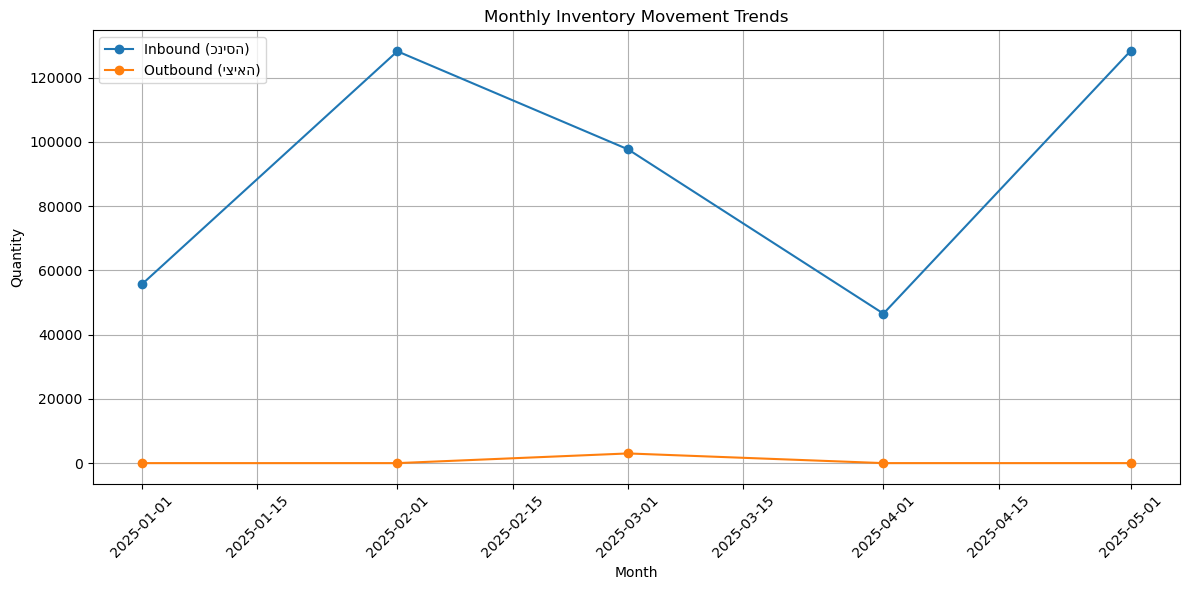

In [223]:
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")

# הוספת עמודת חודש (לניתוח חודשי)
inventory_df["חודש"] = inventory_df["תאריך"].dt.to_period("M")

# תנועות חיוביות = כניסות, שליליות = יציאות
inventory_df["כיוון"] = inventory_df["כמות מפעל"].apply(lambda x: "כניסה" if x > 0 else "יציאה")

# סכימת כמות לפי חודש וכיוון
monthly_trend = inventory_df.groupby(["חודש", "כיוון"])["כמות מפעל"].sum().unstack().fillna(0)

# הפיכת אינדקס לתאריכים לצורך גרף
monthly_trend.index = monthly_trend.index.to_timestamp()

# גרף קווים
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend["כניסה"], marker='o', label='Inbound (כניסה)')
plt.plot(monthly_trend.index, monthly_trend["יציאה"].abs(), marker='o', label='Outbound (יציאה)')

plt.title("Monthly Inventory Movement Trends")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Inventory Seasonality & Frequency – Summary

## Graph – Monthly Inventory Movement Trends

### Observations from the Graph:
- **Inbound (blue line)**:  
  - Strong fluctuations are evident.  
  - Peaks occur in **February** (~128,000 units) and **May** (~129,000 units).  
  - A noticeable drop in **April** (~47,000 units).  
  - This suggests procurement occurs in **large, irregular cycles**, rather than a steady flow.
  
- **Outbound (orange line)**:  
  - Remains almost **flat and close to zero** across all months.  
  - Even during months of high inbound supply, outbound movement does not rise proportionally.  
  - This mismatch highlights possible **stockpiling** or **delayed consumption**.

---

## Key Insights
1. **Inbound volatility vs. stable outbound**  
   The company brings in large shipments irregularly, while usage remains consistently low.

2. **Potential overstocking**  
   Peaks in inbound not matched by outbound imply that items are being stored rather than consumed.

3. **Project-driven procurement**  
   The spikes may reflect preparation for specific projects, rather than steady demand.

---

## Limitations
- Data spans only **5 months (Jan–May 2025)** – insufficient for detecting true seasonality.  
- No historical data available for comparison to prior years.  
- Consumption data may not fully reflect end-user demand if materials are sitting idle.

---

## Recommendations
- **Extend monitoring** into the second half of 2025 to validate whether spikes repeat.  
- **Investigate reasons** for February and May surges: project launches, supplier cycles, or contract-based deliveries.  
- **Cross-check with demand forecasts** – ensure procurement aligns with actual project timelines.  
- Consider **smoothing procurement cycles** to reduce stockpiling and associated holding costs.

---

## Business Summary
The current pattern shows **large, irregular inbound spikes with minimal outbound movement**.  
This creates potential risks of **overstocking**, **cash flow lock-up**, and **inefficient planning**.  
With continued monitoring and better alignment to actual demand, procurement strategy can be significantly improved.


# 7. Supplier Performance Analysis

Evaluating supplier performance is critical for improving procurement reliability and optimizing supply chain operations. In this analysis, we assess supplier behavior based on **delivery frequency** and **consistency of delivered quantities**.


In [224]:
import pandas as pd

# קריאה לקובצי המלאי (אם טרם נעשה)
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

# ניקוי עמודות
inventory_df.columns = inventory_df.columns.str.strip()

# המרה לפורמטים מתאימים
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")
inventory_df["תאריך"] = pd.to_datetime(inventory_df["תאריך"], errors="coerce")

# שלב: סינון רק תנועות **כניסה** למלאי (כלומר אספקות מספק)
inbound_df = inventory_df[
    (inventory_df["כמות מפעל"] > 0) &
    (inventory_df["שם ספק"].notna())
].copy()

# ניתוח לפי ספק – מספר אספקות, סך הכמות שסופקה, ממוצע כמות להזמנה
supplier_performance = (
    inbound_df.groupby("שם ספק")
    .agg(
        מספר_אספקות=("כמות מפעל", "count"),
        סך_כמות_סופקה=("כמות מפעל", "sum"),
        ממוצע_כמות_לאספקה=("כמות מפעל", "mean"),
        מס_חודשים_פעילים=("תאריך", lambda x: x.dt.month.nunique())
    )
    .reset_index()
)

# חישוב ממוצע אספקות לחודש
supplier_performance["אספקות_לחודש"] = (
    supplier_performance["מספר_אספקות"] / supplier_performance["מס_חודשים_פעילים"]
).round(1)

# הצגה
supplier_performance = supplier_performance.sort_values("מספר_אספקות", ascending=False)
supplier_performance.head(20)


,שם ספק,מספר_אספקות,סך_כמות_סופקה,ממוצע_כמות_לאספקה,מס_חודשים_פעילים,אספקות_לחודש
25,"ג.ברס שיווק (1983) בע""מ",142,83691.0,589.373239,5,28.4
44,חגי ירון,103,848.0,8.233010,5,20.6
66,"נ.חן חשמל בע""מ",98,5437.0,55.479592,5,19.6
8,"אדוויס אלקטרוניקה בע""מ",91,214.0,2.351648,5,18.2
77,"עופר שערים אוטומטיים בע""מ",85,199.0,2.341176,5,17.0
91,"שיכון ובינוי סולל בונה-מנורה מערכות בע""מ",84,3002.0,35.738095,5,16.8
19,"ארכה בע""מ",68,19367.0,284.808824,5,13.6
98,"תפוז חשמל אלקטרוניקה ובקרה בע""מ",65,1151.0,17.707692,5,13.0
84,"קמחי כלי עבודה (1994) בע""מ",64,767.0,11.984375,4,16.0
86,"רז צ.צ טכני 2003 בע""מ",54,1298.0,24.037037,5,10.8


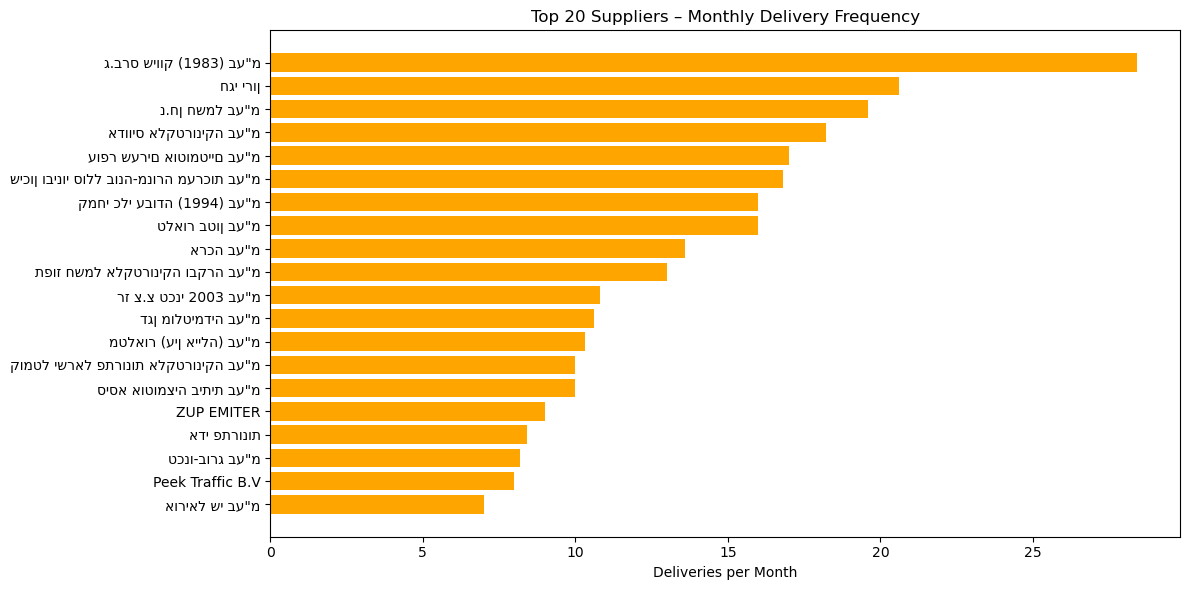

In [225]:
top_suppliers = supplier_performance.sort_values("אספקות_לחודש", ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_suppliers["שם ספק"], top_suppliers["אספקות_לחודש"], color='orange')
plt.xlabel("Deliveries per Month")
plt.title("Top 20 Suppliers – Monthly Delivery Frequency")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [226]:
delivery_df = inventory_df[inventory_df["סוג תנועת מלאי"] == "קבלות סחורה מספק"].copy()

delivery_df["כמות מפעל"] = pd.to_numeric(delivery_df["כמות מפעל"], errors="coerce")
delivery_df = delivery_df.dropna(subset=["כמות מפעל", "שם ספק"])

supplier_delivery_stats = (
    delivery_df.groupby("שם ספק")["כמות מפעל"]
    .agg(["count", "sum", "mean", "std", "min", "max"])
    .rename(columns={
        "count": "מספר אספקות",
        "sum": "סה״כ כמות",
        "mean": "ממוצע כמות",
        "std": "סטיית תקן",
        "min": "כמות מינימלית",
        "max": "כמות מקסימלית"
    })
    .sort_values("סה״כ כמות", ascending=False)
)

supplier_delivery_stats = supplier_delivery_stats.round(2)

supplier_delivery_stats.head(10)


,מספר אספקות,סה״כ כמות,ממוצע כמות,סטיית תקן,כמות מינימלית,כמות מקסימלית
שם ספק,,,,,,
"ג.ברס שיווק (1983) בע""מ",142,83691.0,589.37,1125.40,4.0,12200.0
"טכנו-בורג בע""מ",41,35226.0,859.17,1870.34,1.0,10000.0
"ארכה בע""מ",69,19367.0,280.68,420.74,0.0,2000.0
"פניקס קונטקס ( ישראל) בע""מ",8,11910.0,1488.75,2067.58,10.0,5000.0
"אוריאל שי בע""מ",35,5507.0,157.34,234.93,1.0,1000.0
"נ.חן חשמל בע""מ",99,5437.0,54.92,85.45,0.0,500.0
"שיכון ובינוי סולל בונה-מנורה מערכות בע""מ",84,3002.0,35.74,76.52,1.0,520.0
ZUP EMITER,9,2303.0,255.89,293.83,3.0,700.0
"שי פייבר בע""מ",4,2225.0,556.25,514.93,175.0,1300.0


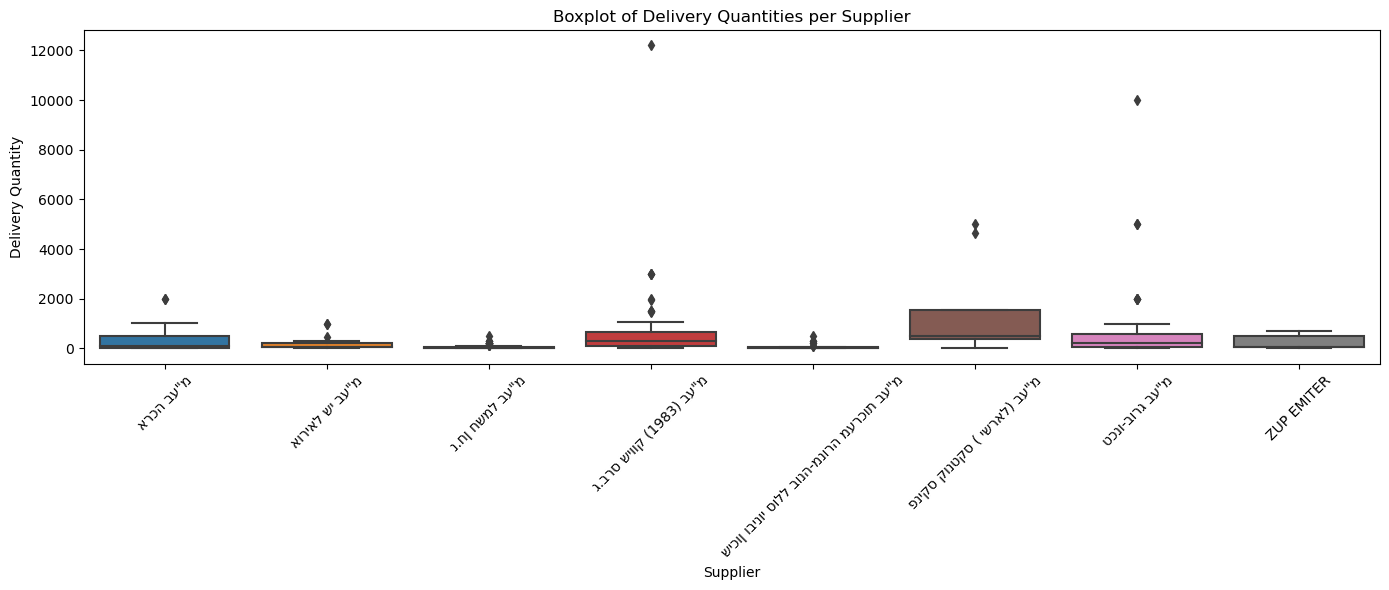

In [227]:
df1 = pd.read_csv("inventory_movements_jan_apr_2025.csv")
df2 = pd.read_csv("inventory_movements_apr_on_2025.csv")
inventory_df = pd.concat([df1, df2], ignore_index=True)

inventory_df.columns = inventory_df.columns.str.strip()
inventory_df["כמות מפעל"] = pd.to_numeric(inventory_df["כמות מפעל"], errors="coerce")

supplier_deliveries = inventory_df[inventory_df["סוג תנועת מלאי"] == "קבלות סחורה מספק"]

top_suppliers_list = supplier_deliveries.groupby('שם ספק')["כמות מפעל"].sum().nlargest(8).index
top_suppliers_data = supplier_deliveries[supplier_deliveries["שם ספק"].isin(top_suppliers_list)].copy()

plt.figure(figsize=(14, 6))
sns.boxplot(data=top_suppliers_data, x="שם ספק", y="כמות מפעל")
plt.title("Boxplot of Delivery Quantities per Supplier")
plt.xlabel("Supplier")
plt.ylabel("Delivery Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Delivery Frequency by Supplier

The first bar chart shows the **Top 20 suppliers ranked by average monthly delivery frequency**.  
- A few suppliers, such as **Supplier “קויש סר.ג (1983)”**, deliver significantly more frequently (over 25 deliveries per month), making them highly active and central to operations.  
- Most other suppliers fall within the range of **8–18 deliveries per month**, highlighting a more moderate activity level.  
- These differences suggest varying levels of dependency on specific suppliers. Suppliers with higher frequency are more critical but also represent greater risk if issues arise.

---

## Delivery Consistency by Supplier

The second graph (boxplot) illustrates the **distribution and variability of delivery quantities** per supplier.  
- **Stable Suppliers**: Some suppliers, such as **ZUP EMITER** and **M.עב לשה וח.ג**, show **narrow interquartile ranges (IQRs)** and few outliers. This indicates consistent delivery sizes and predictable patterns, which are beneficial for inventory planning.  
- **Unstable Suppliers**: Others, such as **קויש סר.ג (1983)** and **מ.עב גרוב-ונסט**, show **wide variability and extreme outliers**, with deliveries ranging from very small to very large. This inconsistency can complicate forecasting and may signal weak coordination or irregular demand cycles.  

The presence of **outliers** in some suppliers suggests occasional large shipments, potentially tied to **project-based orders** or emergency procurement rather than standard replenishment.

---

## Conclusions

1. Suppliers with **high frequency and stability** are strategic partners that enable smooth supply operations.  
2. Suppliers with **high variability** present risks of overstocking, stockouts, or planning inefficiencies.  
3. Frequent but inconsistent suppliers may need **closer monitoring and stricter coordination**.  

---

## Recommendations

- **Strengthen collaboration** with stable suppliers to lock in reliability and possibly negotiate better terms.  
- For suppliers with unstable delivery patterns, establish **forecasting agreements or order guidelines** to reduce variability.  
- Conduct **root-cause analysis** of extreme outliers to determine whether they are caused by poor planning, special projects, or supplier-side constraints.  
- Diversify sourcing where possible to reduce reliance on a small number of high-frequency but unstable suppliers.  

<div align="center">
  <img src="https://raw.githubusercontent.com/NirAvrahamoff/ysb-operations-analysis/main/ChatGPT%20Image%20Aug%2017%2C%202025%2C%2007_06_49%20PM.png" width="600"/>
</div>